## Data Exploration using Census Data

In this project I used census data from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. A copy of this dataset is located at UCI Machine Learning repository, please see this [link](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29) to reach to the dataset website.

This dataset contains census data extracted from the 1994 and 1995 Current Population Surveys. I will only work with 'training' data (a link to that is provided to you below). The data contains 41 demographic and employment related variables. The abbreviated column names provided to you below. Additional information can be found [in the data description](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.html) and [additional comments](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.names).

In [ ]:
import os
os.getcwd()

'C:\\Users\\peace'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import urllib.request
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.gz'
census_dl_file = './census-income.data.gz'
urllib.request.urlretrieve(url, census_dl_file)

('./census-income.data.gz', <http.client.HTTPMessage at 0x264a4d91a60>)

In [ ]:
columns_abbr = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC',
                'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 
                'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 
                'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 
                'VETQVA', 'VETYN', 'WKSWORK', 'YEAR', 'PTOTVALB']

In [ ]:
# you can read from the compressed file
df = pd.read_csv('census-income.data.gz', compression='gzip', names=columns_abbr, sep=r',', skipinitialspace=True)
df.head()

# you can also unzip census-income.zip and read using the following
# df = pd.read_csv('census-income.csv', names=columns_abbr, sep=r',', skipinitialspace=True)

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVALB
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [15]:
# you can see the DataFrame's info panel here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AAGE      199523 non-null  int64  
 1   ACLSWKR   199523 non-null  object 
 2   ADTIND    199523 non-null  int64  
 3   ADTOCC    199523 non-null  int64  
 4   AHGA      199523 non-null  object 
 5   AHRSPAY   199523 non-null  int64  
 6   AHSCOL    199523 non-null  object 
 7   AMARITL   199523 non-null  object 
 8   AMJIND    199523 non-null  object 
 9   AMJOCC    199523 non-null  object 
 10  ARACE     199523 non-null  object 
 11  AREORGN   198649 non-null  object 
 12  ASEX      199523 non-null  object 
 13  AUNMEM    199523 non-null  object 
 14  AUNTYPE   199523 non-null  object 
 15  AWKSTAT   199523 non-null  object 
 16  CAPGAIN   199523 non-null  int64  
 17  CAPLOSS   199523 non-null  int64  
 18  DIVVAL    199523 non-null  int64  
 19  FILESTAT  199523 non-null  object 
 20  GRIN

### Q1 - Basic Dataset Manipulation

In [ ]:

# here I Sorted the instances in the dataset based on their age in descending order (AAGE attribute in the Census dataset corresponds to the age) and displayed top-20 instances
df.sort_values('AAGE', ascending=False).head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVALB
46356,90,Not in universe,0,0,1st 2nd 3rd or 4th grade,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Italy,Italy,United-States,Native- Born in the United States,0,No,1,0,95,- 50000.
96646,90,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Ecuador,Ecuador,Ecuador,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
80878,90,Not in universe,0,0,7th and 8th grade,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Italy,Italy,Italy,Foreign born- U S citizen by naturalization,0,Not in universe,2,0,94,- 50000.
126478,90,Not in universe,0,0,10th grade,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
149712,90,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.


In [ ]:
#### here I found the average age for top 7% oldest instances Displayed to two decimal places for the average age
#df.sample[frac=0.07, 'AAGE'].mean()
df1=df.sort_values('AAGE', ascending=False)
n = 199523
df2=df1.head(int(len(df)*(7/100)))
df3=df2['AAGE'].mean()
print(f' {df3: .2f}')


  78.70


In [ ]:
# here I Found and displayed the median age of instances for each reported race.
df.groupby(df['ARACE']).median()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,MARSUPWT,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
ARACE,,,,,,,,,,,,,
Amer Indian Aleut or Eskimo,25.0,0.0,0.0,0.0,0.0,0.0,0.0,690.42,0.0,0.0,2.0,0.0,95.0
Asian or Pacific Islander,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1350.35,1.0,0.0,2.0,1.0,95.0
Black,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1941.25,0.0,0.0,2.0,0.0,94.0
Other,23.0,0.0,0.0,0.0,0.0,0.0,0.0,943.51,0.0,0.0,2.0,0.0,95.0
White,34.0,2.0,2.0,0.0,0.0,0.0,0.0,1614.19,1.0,0.0,2.0,12.0,94.0


#####  Here I Identified the data scales and data types for each variable in the dataset. Identified the domain for each variable by checking the attributes' values. Then, created a data quality report for both categorical (nominal, ordinal) and continuous (interval, ratio) variables.
 

Here I created an external csv file consisting seven columns, that is; feature name, description, scale, data type, scale, domain, missing_values ) and displayed it.

In [ ]:
# your code goes here
features_df = pd.read_excel('./DataNOIR_xlsx.xlsx', sheet_name='DataNOIR')
features_df.head(10)

,col_name,desc,data_type,"scale (N, O, I, R)",domain,missing_values
0,AAGE,age,Int64,R,All positive integers,NaN
1,ACLSWKR,class of worker,"Texts, strings",N,Texts,NaN
2,ADTIND,industry code,Int64,N,All positive integers,NaN
3,ADTOCC,occupation code,Int64,N,All positive integers,NaN
4,AHGA,education,Variable Characters,O,children and the various level of educations(V...,NaN
5,AHRSPAY,wage per hour,Int64,R,positive integers,NaN
6,AHSCOL,enrolled in edu inst last wk,"Texts, strings",N,"text, strings",NaN
7,AMARITL,marital status,"Texts, strings",N,"Texts(married, single, divorced, widow…)",NaN
8,AMJIND,major industry code,"Texts, strings",N,All Job categories(Texts),NaN
9,AMJOCC,major occupation code,"Texts, strings",N,All Job categories(Texts),NaN


#### Here I Created a Data Quality Report

Included the bar plots and histograms for visualizing the distributions.

In [ ]:
# This gives me the cardinality, null values, total number of records in a column
for (name, series) in df.iteritems():
  print('ANALYZING THE COLUMN:', name)
  print('\tTotal number of records', series.size)
  print('\tNumber of missing values', series.isnull().sum())
  print('\tPercentage of missing values {0}%'.format(((series.isnull().sum()/series.size)*100)) )
  print('\tNumber of unique values', series.unique().size)

In [ ]:
#I used this code to generate unique values in each column so I can identify null values in form of special characters
# print('NaN' in df['AREORGN'].values) 
for (name, series) in df.iteritems():
    print('ANALYZING THE COLUMN:', name)
    print('\tMode count  ', series.value_counts().head())

ANALYZING THE COLUMN: AAGE
	Mode count   34    3489
35    3450
36    3353
31    3351
33    3340
Name: AAGE, dtype: int64
ANALYZING THE COLUMN: ACLSWKR
	Mode count   Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Name: ACLSWKR, dtype: int64
ANALYZING THE COLUMN: ADTIND
	Mode count   0     100684
33     17070
43      8283
4       5984
42      4683
Name: ADTIND, dtype: int64
ANALYZING THE COLUMN: ADTOCC
	Mode count   0     100684
2       8756
26      7887
19      5413
29      5105
Name: ADTOCC, dtype: int64
ANALYZING THE COLUMN: AHGA
	Mode count   High school graduate          48407
Children                      47422
Some college but no degree    27820
Bachelors degree(BA AB BS)    19865
7th and 8th grade              8007
Name: AHGA, dtype: int64
ANALYZING THE COLUMN: AHRSPAY
	Mode count   0      188219
500       734
600       546


In [ ]:
#Here I replaced all ? in each column with NaN
df_clean = df.replace(['?'],'NaN') 

In [ ]:
#Here I generted more statistics for my data quality report
for (name, series) in df.iteritems():
  print('ANALYZING THE COLUMN:', name)
  print('\tTotal number of records', series.size)
  print('\tNumber of missing values', series.isnull().sum())
  print('\tPercentage of missing values {0}%'.format(((series.isnull().sum()/series.size)*100)) )
  print('\tNumber of unique values', series.unique().size)

ANALYZING THE COLUMN: AAGE
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 91
ANALYZING THE COLUMN: ACLSWKR
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 9
ANALYZING THE COLUMN: ADTIND
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 52
ANALYZING THE COLUMN: ADTOCC
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 47
ANALYZING THE COLUMN: AHGA
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 17
ANALYZING THE COLUMN: AHRSPAY
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 1240
ANALYZING THE COLUMN: AHSCOL
	Total number of records 199523
	Number of missing values 0


In [ ]:
#My Data Quality report for continuos variables
features_df = pd.read_excel('./DataNOIR_xlsx.xlsx', sheet_name='Sheet1')
features_df.head()


,Feature,Desc,count,%of missing,Card,Min,Q1,Median,Q3,Max,Mean,Std.Dev
0,AAGE,Age,199523,0,91,0.0,15.0,33.0,50.0,90.0,34.49,22.31
1,AHRSPAY,wage per hour,199523,0,1240,0.0,0.0,0.0,0.0,9999.0,55.43,274.89
2,CAPGAIN,Capital gain,199523,0,132,0.0,0.0,0.0,0.0,99999.0,434.72,4697.53
3,CAPLOSS,Capital loss,199523,0,113,0.0,0.0,0.0,0.0,4608.0,37.31,271.89
4,DIVVAL,divdends from stocks,199523,0,1478,0.0,0.0,0.0,0.0,99999.9,197.53,1984.16


In [ ]:
#My Data Quality report for categorical variables
features_df = pd.read_excel('./DataNOIR_xlsx.xlsx', sheet_name='Sheet2')
features_df.head()

,Feature,Desc,Count,%missing,Card,Mode,Mode Freq,Mode %,2nd Mode,Mode Freq.1,Mode%
0,ACLSWKR,class of worker,199523,0.0,9,Not in universe,100245,50.242328,private,72028,36.100099
1,ADTIND,industry code,199523,0.0,52,0,100684,50.462353,33,17070,8.555405
2,ADTOCC,occupation code,199523,0.0,47,0,100684,50.462353,2,8765,4.392977
3,AHGA,education,199523,0.0,17,High school graduate,48407,24.261363,children,47422,23.767686
4,AHSCOL,enrolled in edu inst last wk,199523,0.0,3,Not in universe,186943,93.694962,High school,6892,3.454238


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [114]:
pd.value_counts(df['ACLSWKR']).reset_index()

,index,ACLSWKR
0,Not in universe,100245
1,Private,72028
2,Self-employed-not incorporated,8445
3,Local government,7784
4,State government,4227
5,Self-employed-incorporated,3265
6,Federal government,2925
7,Never worked,439
8,Without pay,165


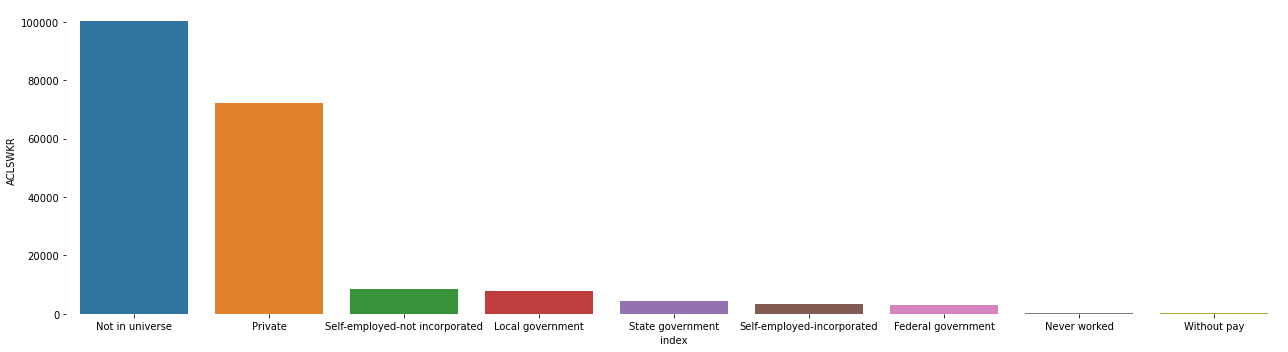

In [135]:
#PLOT OF THE CATEGORICAL VARIABLES
import seaborn as sns
plt.figure(figsize=(18,5))
plot_df= pd.value_counts(df['ACLSWKR']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['ACLSWKR'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

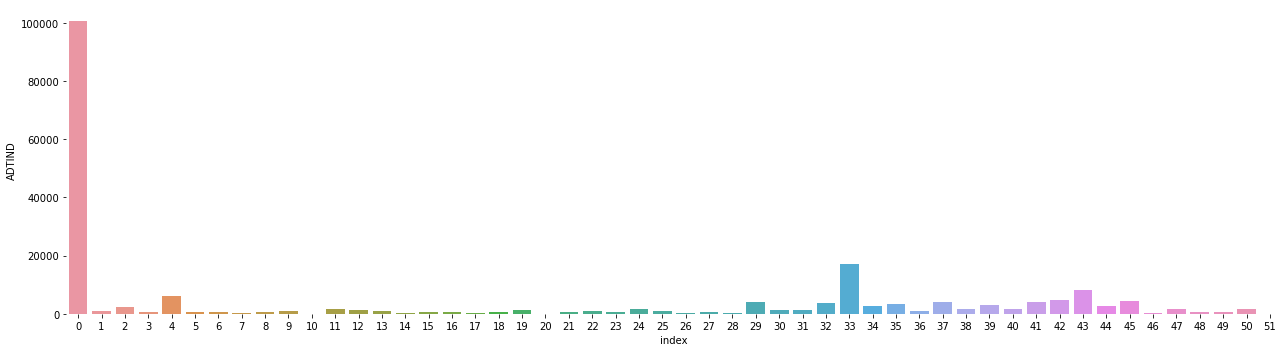

In [146]:
'ADTIND'
plt.figure(figsize=(18,5))
plot_df= pd.value_counts(df['ADTIND']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['ADTIND'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

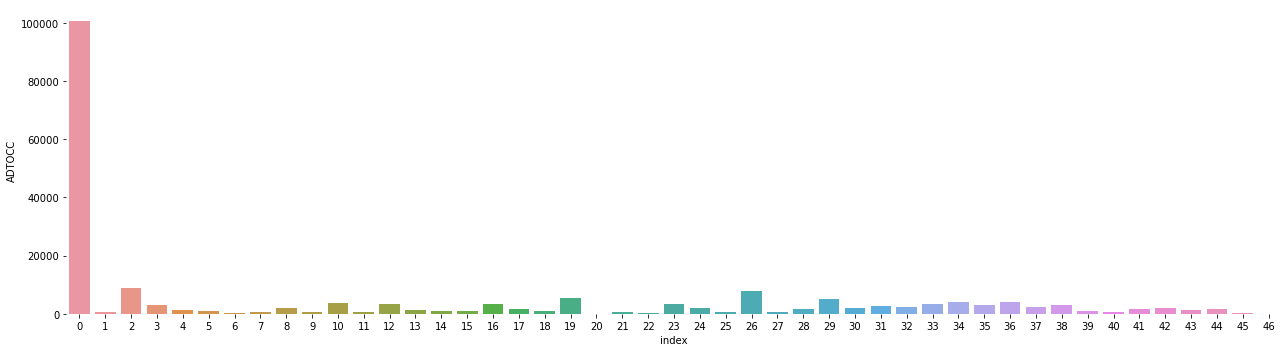

In [147]:
'ADTOCC'
plt.figure(figsize=(18,5))
plot_df= pd.value_counts(df['ADTOCC']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['ADTOCC'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

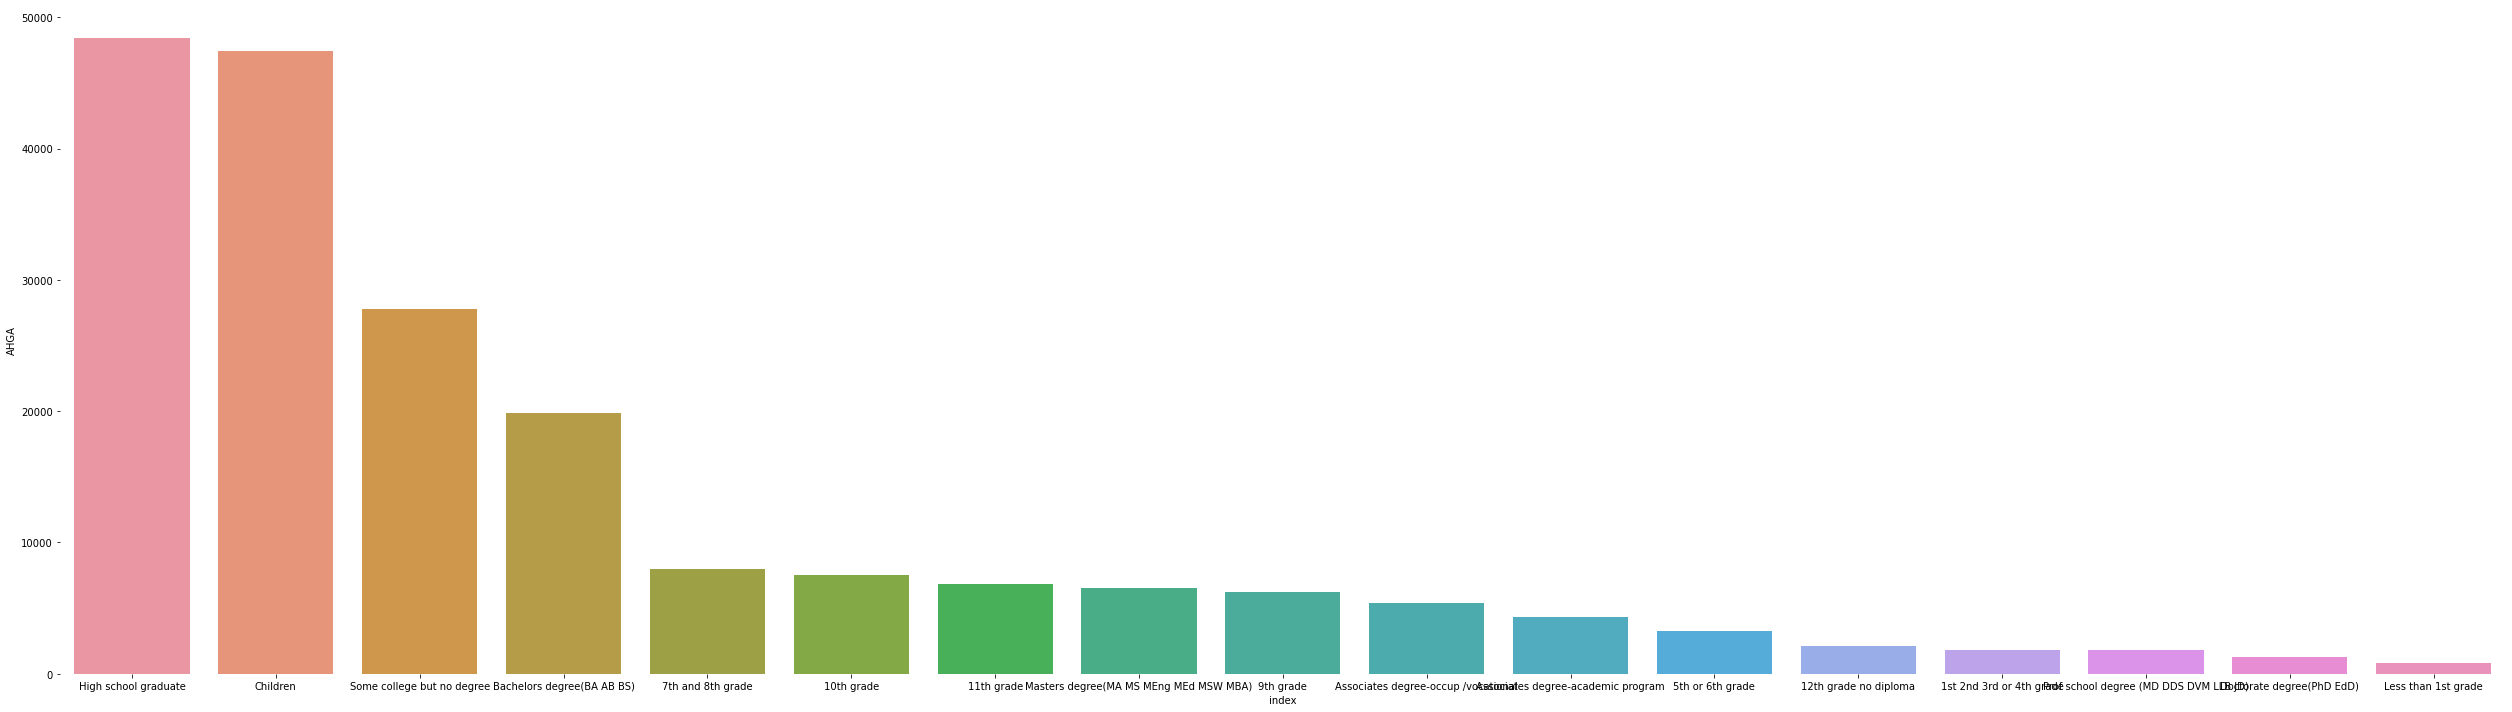

In [153]:
'AHGA'
plt.figure(figsize=(35,10))
plot_df= pd.value_counts(df['AHGA']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['AHGA'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

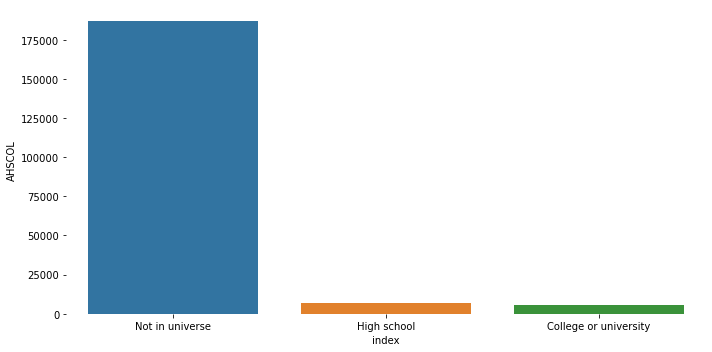

In [156]:
'AHSCOL'
plt.figure(figsize=(10,5))
plot_df= pd.value_counts(df['AHSCOL']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['AHSCOL'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

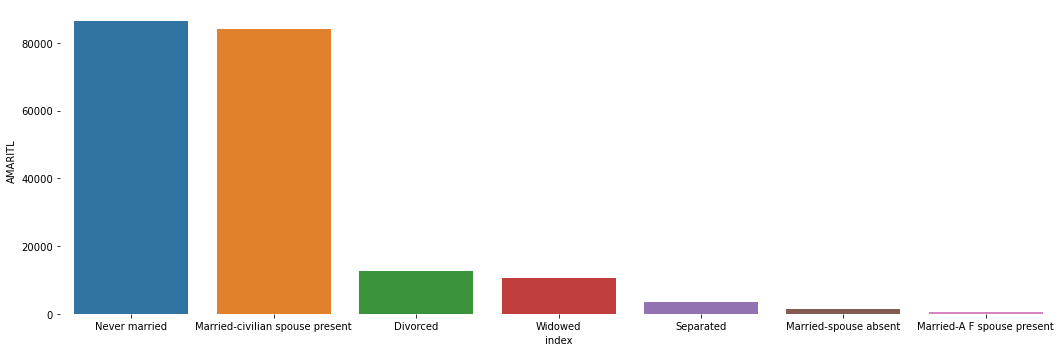

In [158]:
'AMARITL'
plt.figure(figsize=(15,5))
plot_df= pd.value_counts(df['AMARITL']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['AMARITL'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

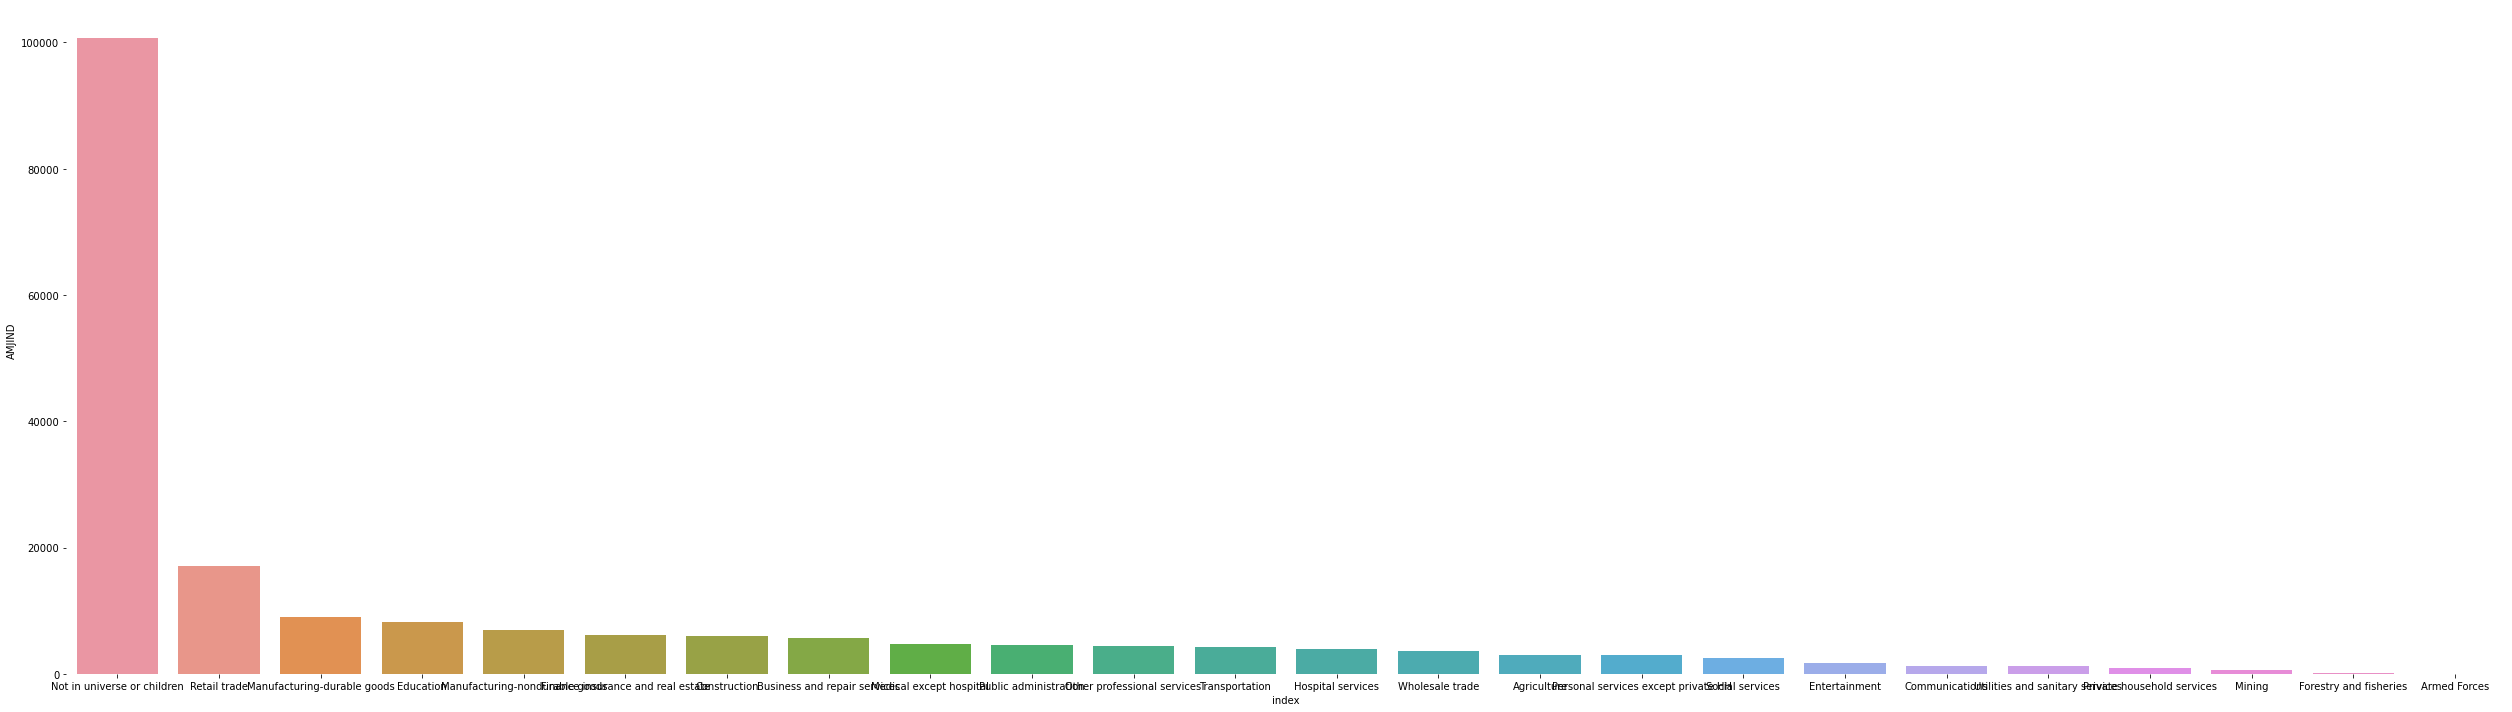

In [162]:
'AMJIND'
plt.figure(figsize=(35,10))
plot_df= pd.value_counts(df['AMJIND']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['AMJIND'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

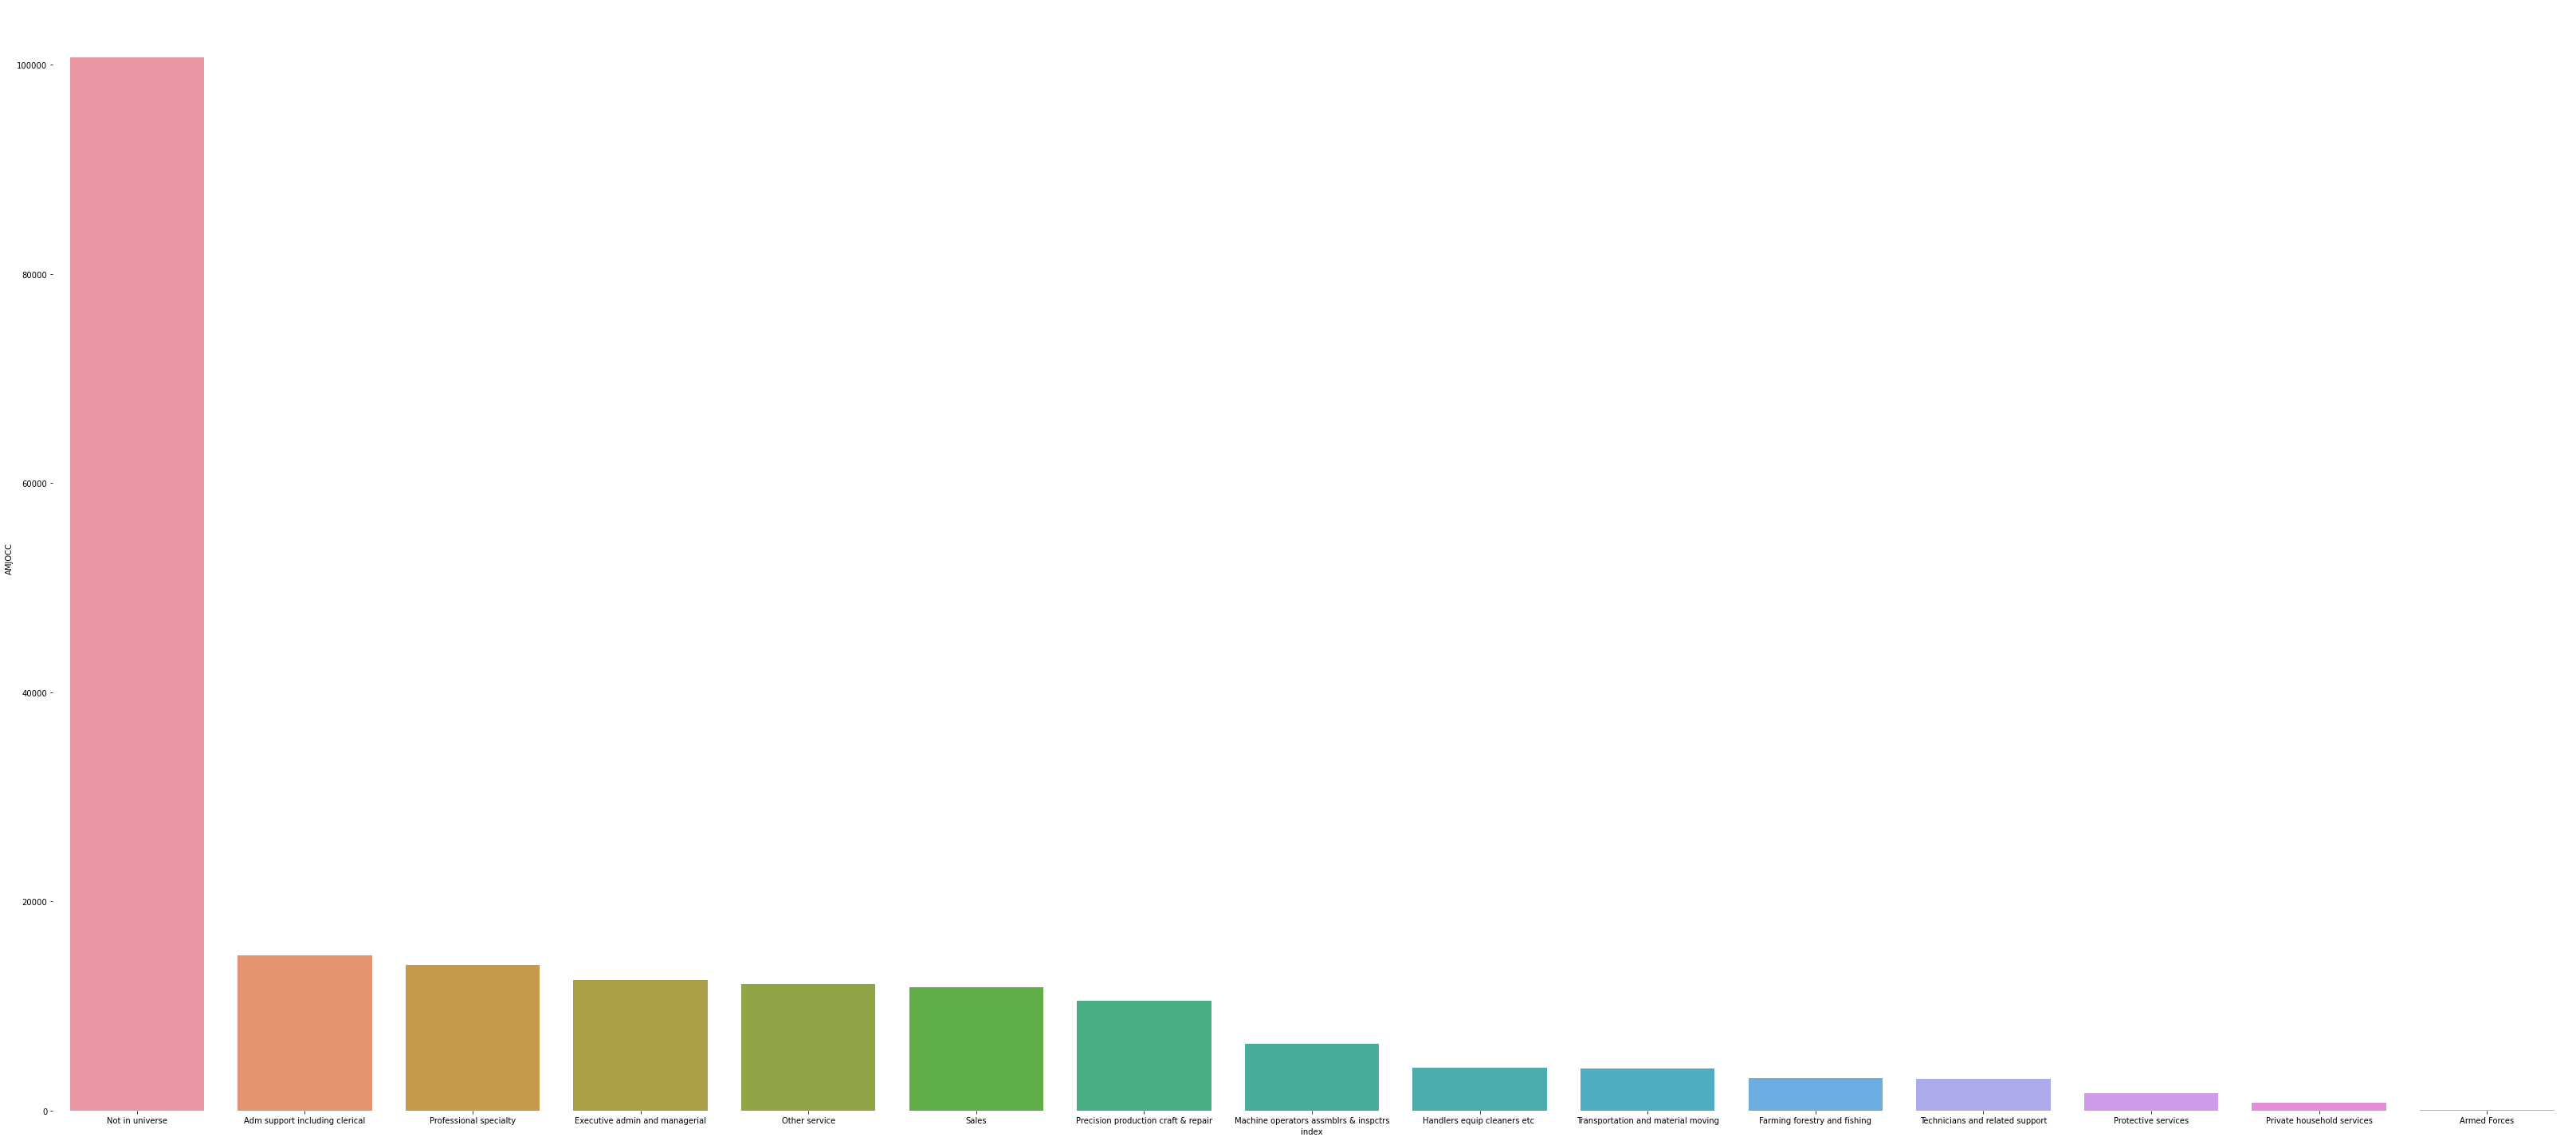

In [169]:
'AMJOCC'
plt.figure(figsize=(45,20))
plot_df= pd.value_counts(df['AMJOCC']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['AMJOCC'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

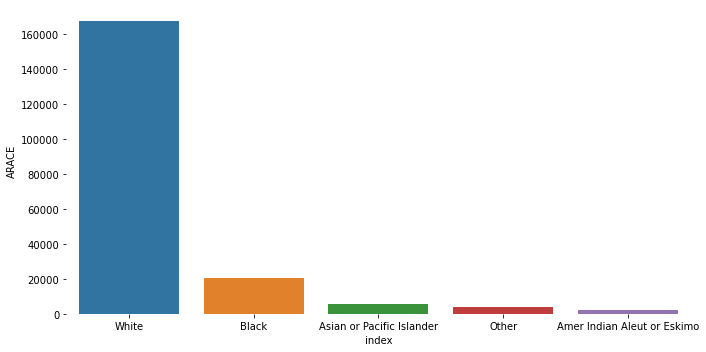

In [171]:
'ARACE'
plt.figure(figsize=(10,5))
plot_df= pd.value_counts(df['ARACE']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['ARACE'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

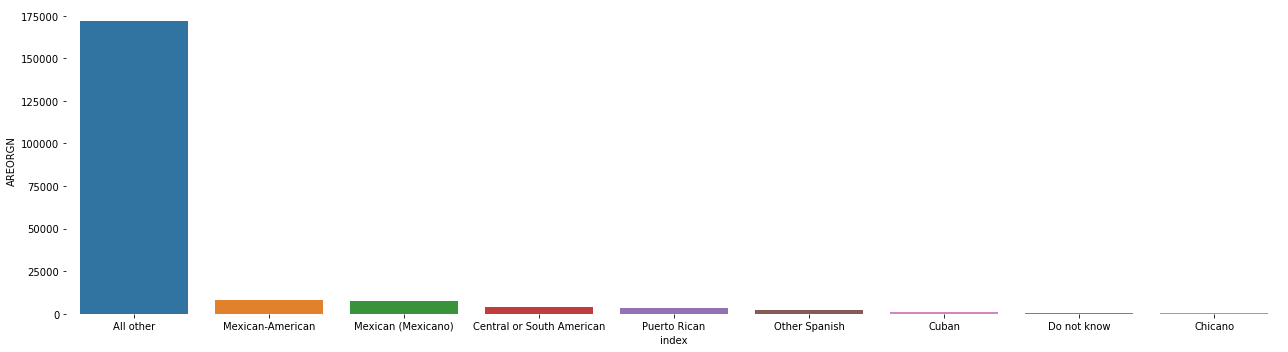

In [174]:
'AREORGN'
plt.figure(figsize=(18,5))
plot_df= pd.value_counts(df['AREORGN']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['AREORGN'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

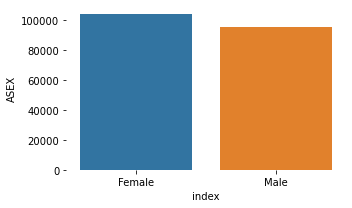

In [230]:
 'ASEX'
plt.figure(figsize=(5,3))
plot_df= pd.value_counts(df['ASEX']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['ASEX'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

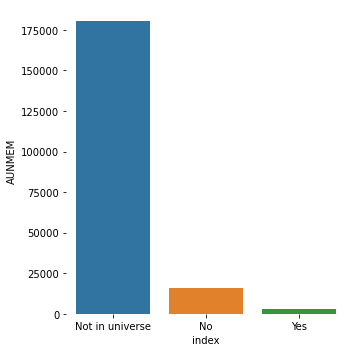

In [178]:
'AUNMEM'
plt.figure(figsize=(5,5))
plot_df= pd.value_counts(df['AUNMEM']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['AUNMEM'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

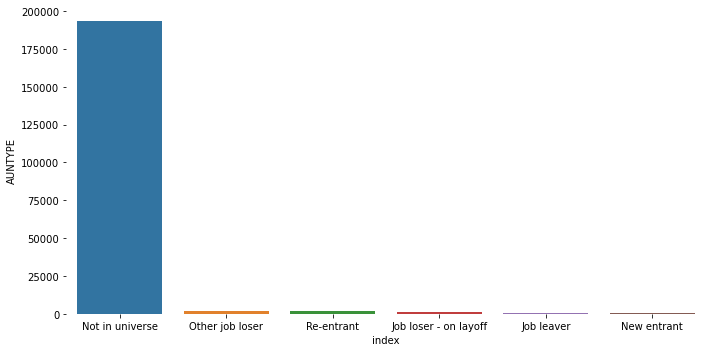

In [181]:
 'AUNTYPE'
plt.figure(figsize=(10,5))
plot_df= pd.value_counts(df['AUNTYPE']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['AUNTYPE'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

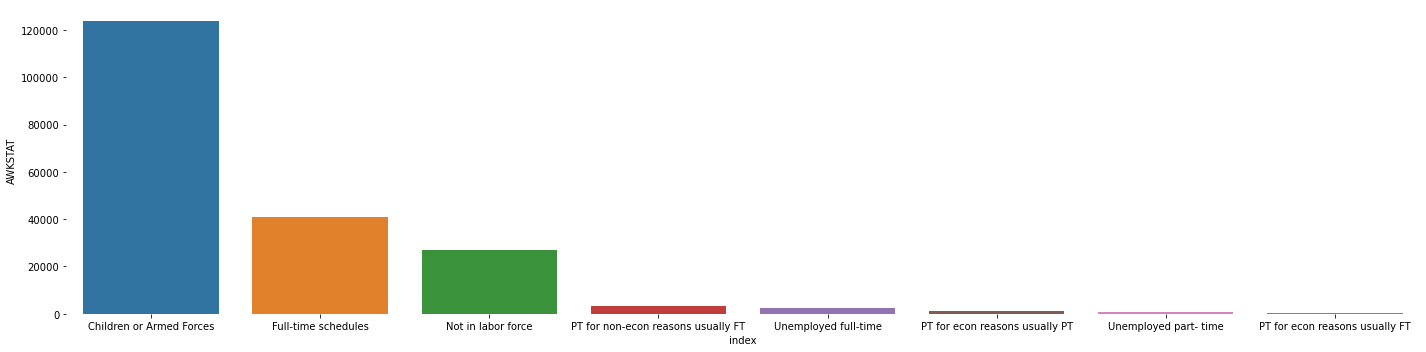

In [183]:
'AWKSTAT'
plt.figure(figsize=(20,5))
plot_df= pd.value_counts(df['AWKSTAT']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['AWKSTAT'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

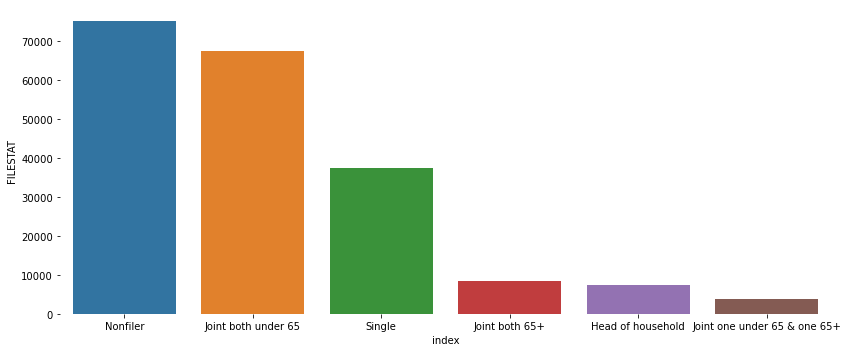

In [187]:
'FILESTAT'
plt.figure(figsize=(12,5))
plot_df= pd.value_counts(df['FILESTAT']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['FILESTAT'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

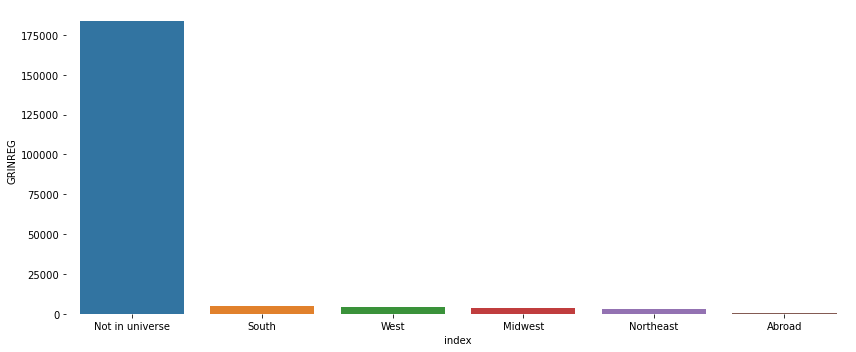

In [188]:
'GRINREG'
plt.figure(figsize=(12,5))
plot_df= pd.value_counts(df['GRINREG']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['GRINREG'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

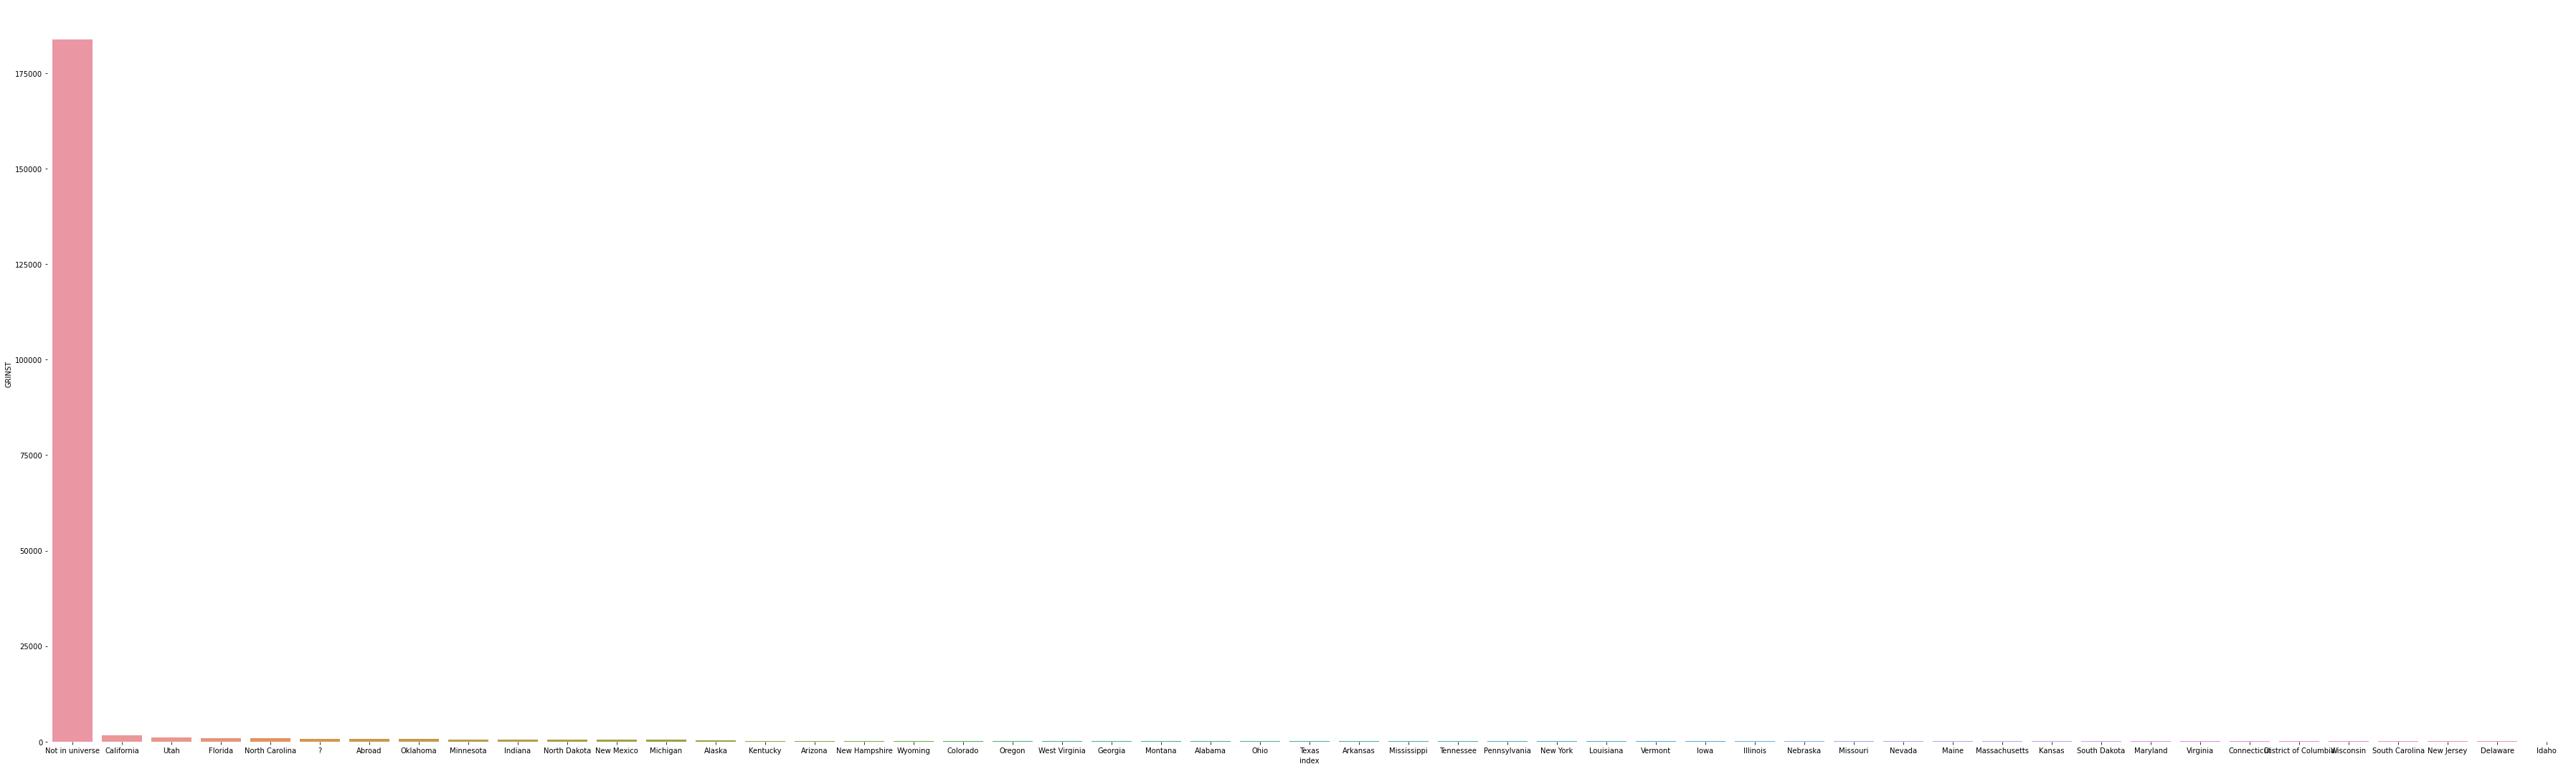

In [194]:
'GRINST'
plt.figure(figsize=(50,15))
plot_df= pd.value_counts(df['GRINST']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['GRINST'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

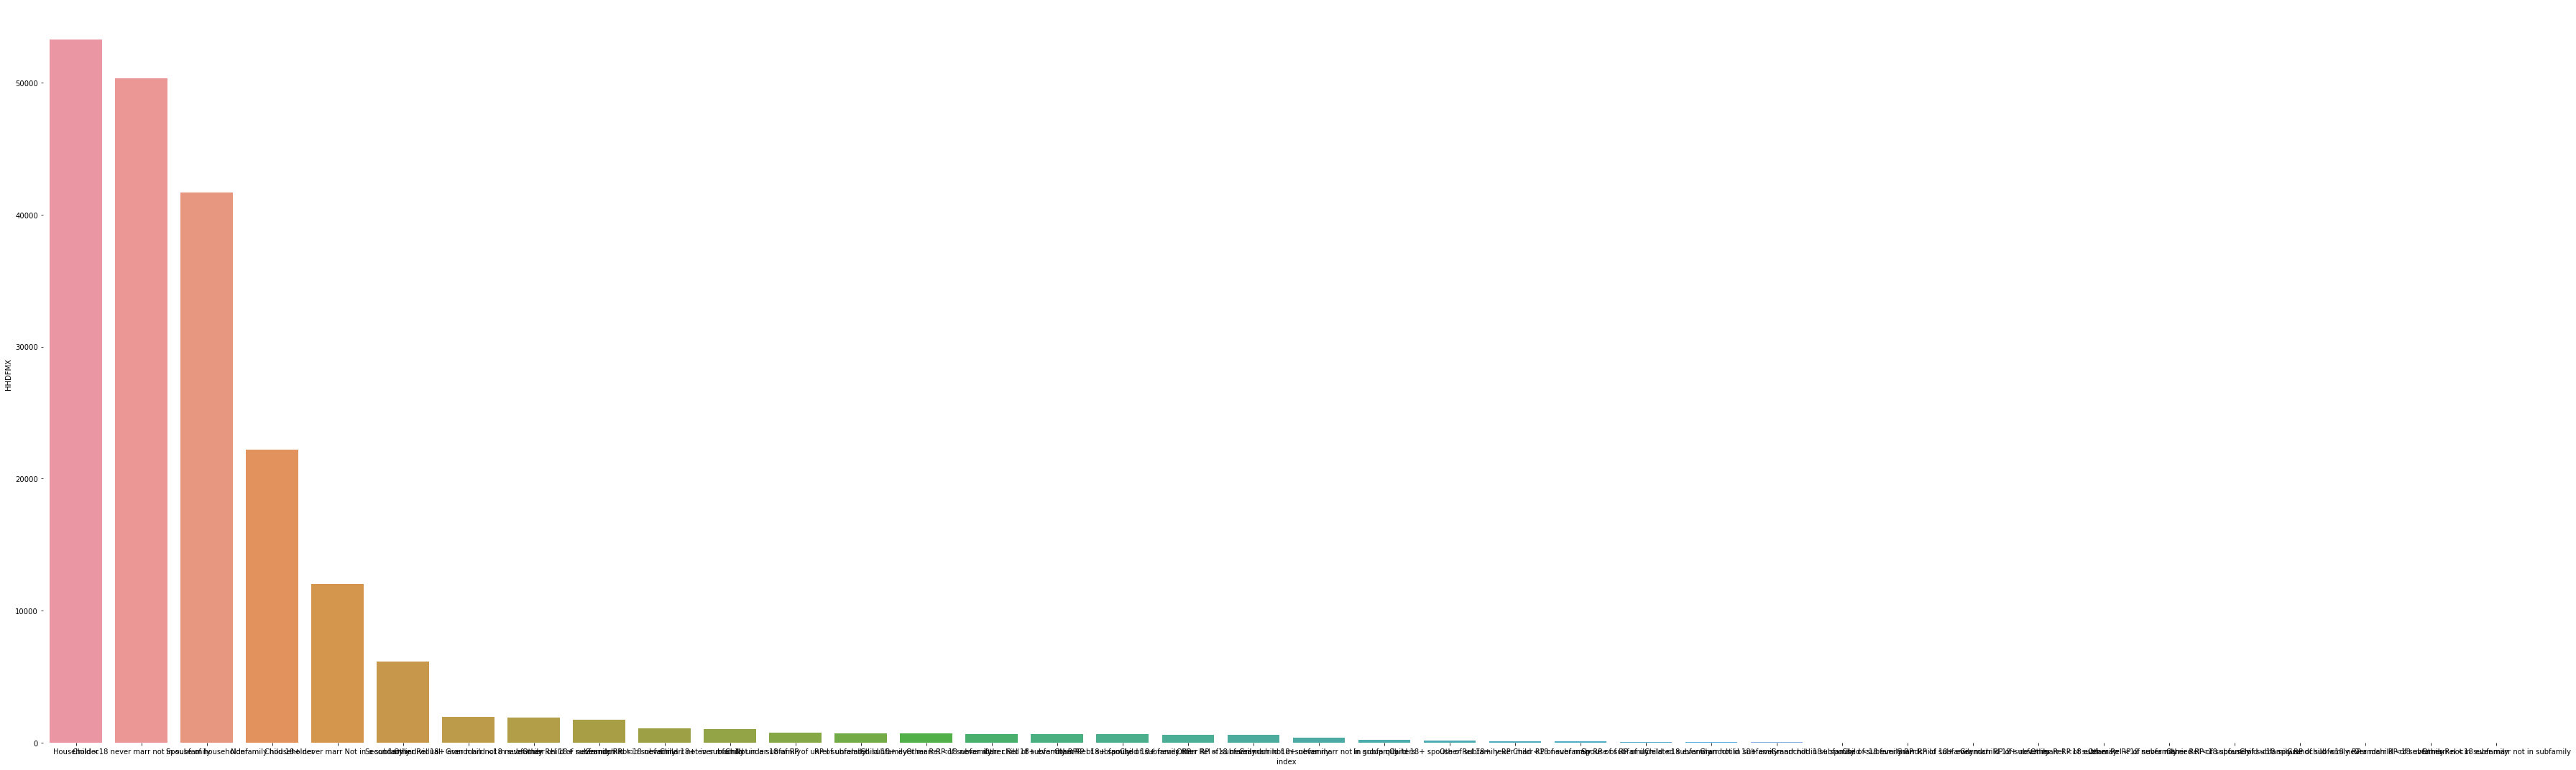

In [195]:
'HHDFMX'
plt.figure(figsize=(50,15))
plot_df= pd.value_counts(df['HHDFMX']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['HHDFMX'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

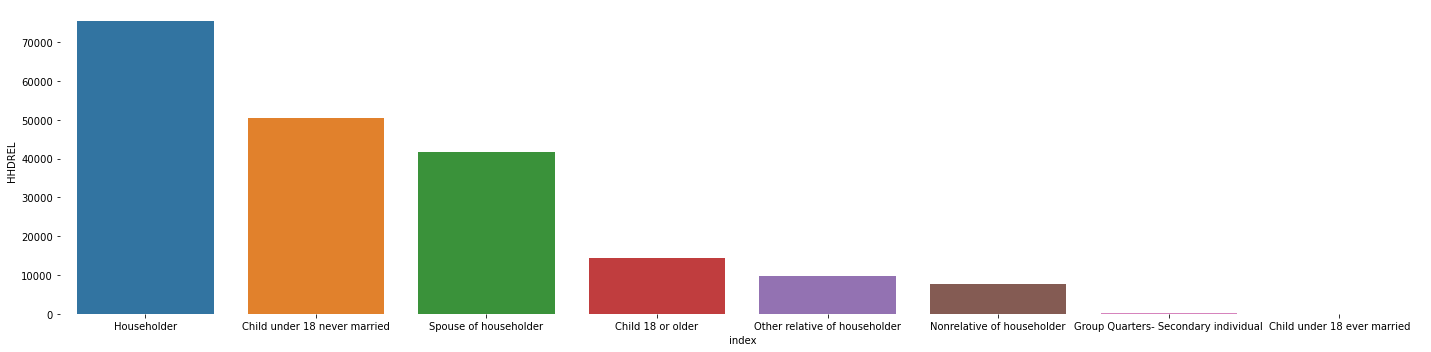

In [198]:
'HHDREL'
plt.figure(figsize=(20,5))
plot_df= pd.value_counts(df['HHDREL']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['HHDREL'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

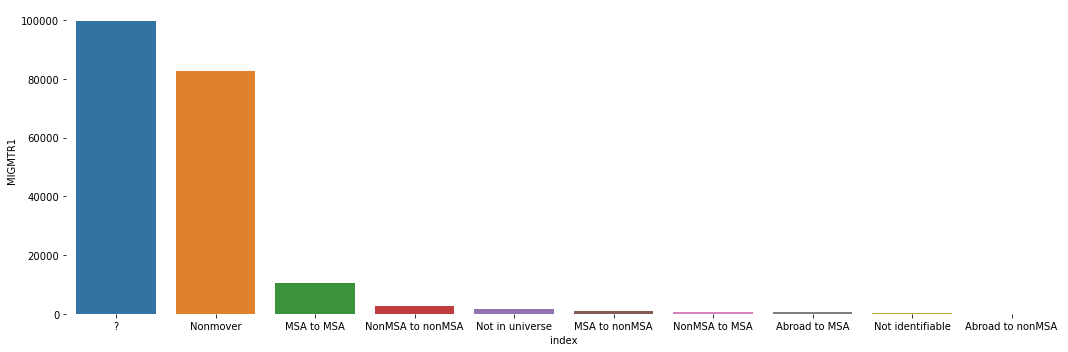

In [200]:
'MIGMTR1'
plt.figure(figsize=(15,5))
plot_df= pd.value_counts(df['MIGMTR1']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['MIGMTR1'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

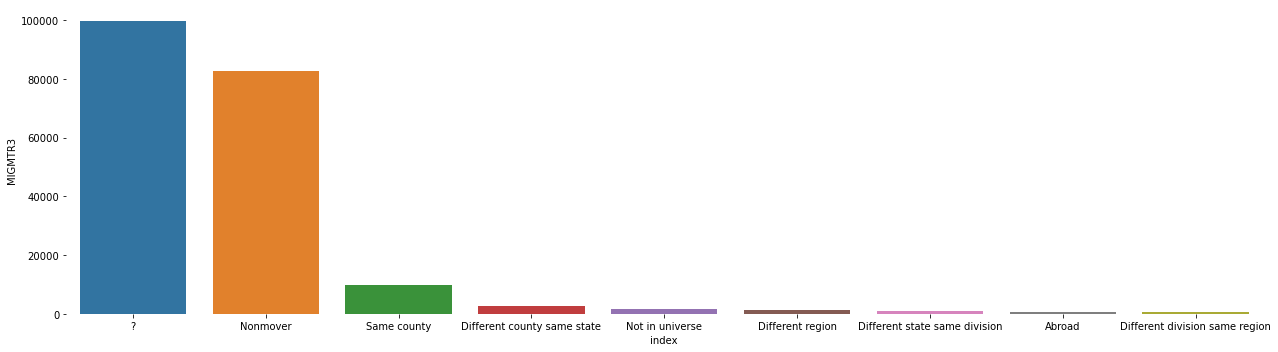

In [202]:
'MIGMTR3'
plt.figure(figsize=(18,5))
plot_df= pd.value_counts(df['MIGMTR3']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['MIGMTR3'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

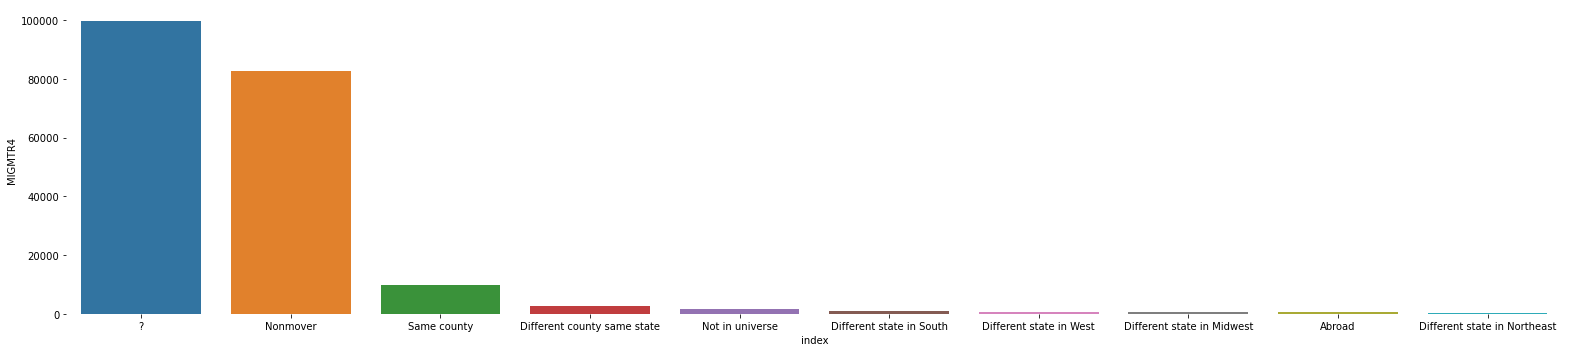

In [204]:
'MIGMTR4'
plt.figure(figsize=(22,5))
plot_df= pd.value_counts(df['MIGMTR4']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['MIGMTR4'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

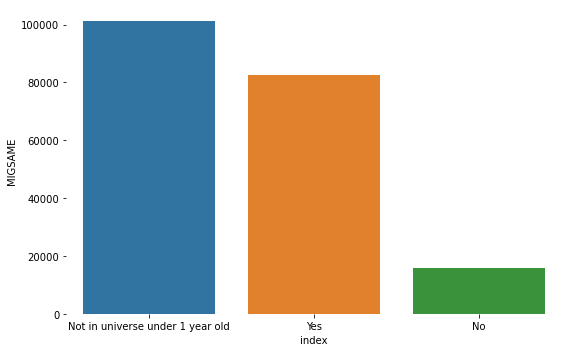

In [208]:
'MIGSAME'
plt.figure(figsize=(8,5))
plot_df= pd.value_counts(df['MIGSAME']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['MIGSAME'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

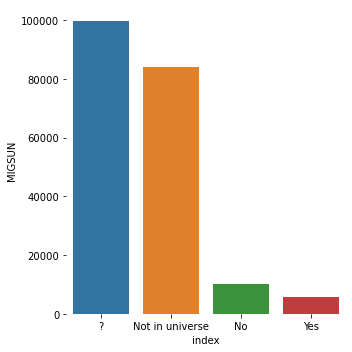

In [211]:
'MIGSUN'
plt.figure(figsize=(5,5))
plot_df= pd.value_counts(df['MIGSUN']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['MIGSUN'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

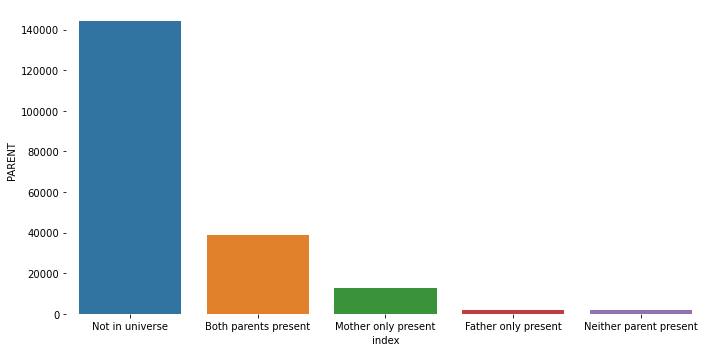

In [214]:
'PARENT'
plt.figure(figsize=(10,5))
plot_df= pd.value_counts(df['PARENT']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['PARENT'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

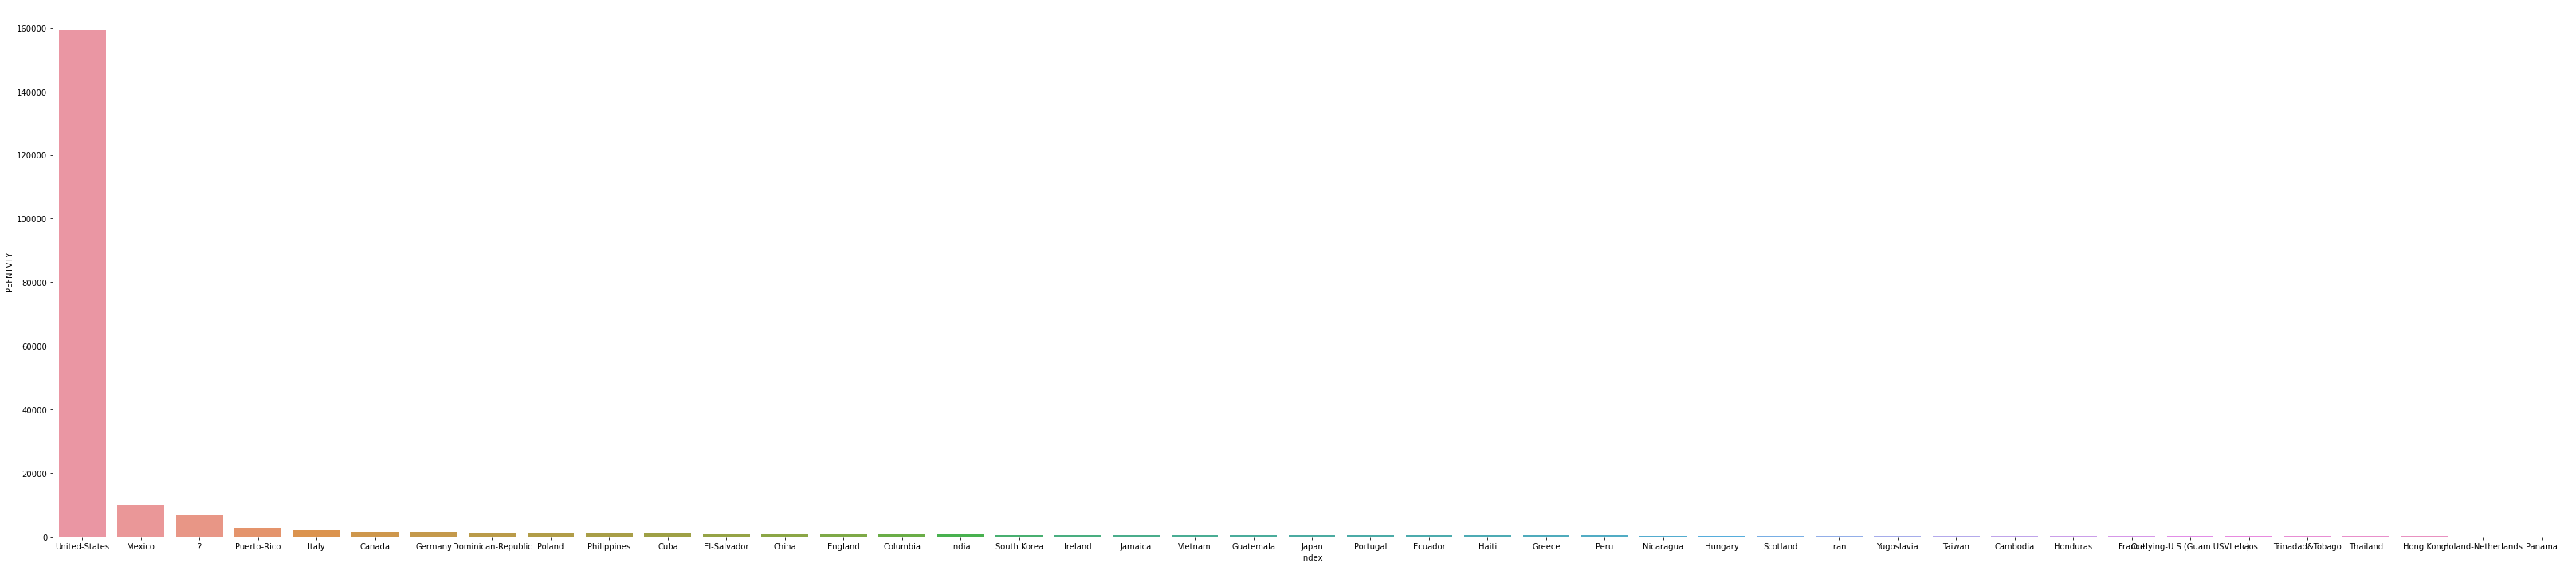

In [217]:
'PEFNTVTY'
plt.figure(figsize=(45,10))
plot_df= pd.value_counts(df['PEFNTVTY']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['PEFNTVTY'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

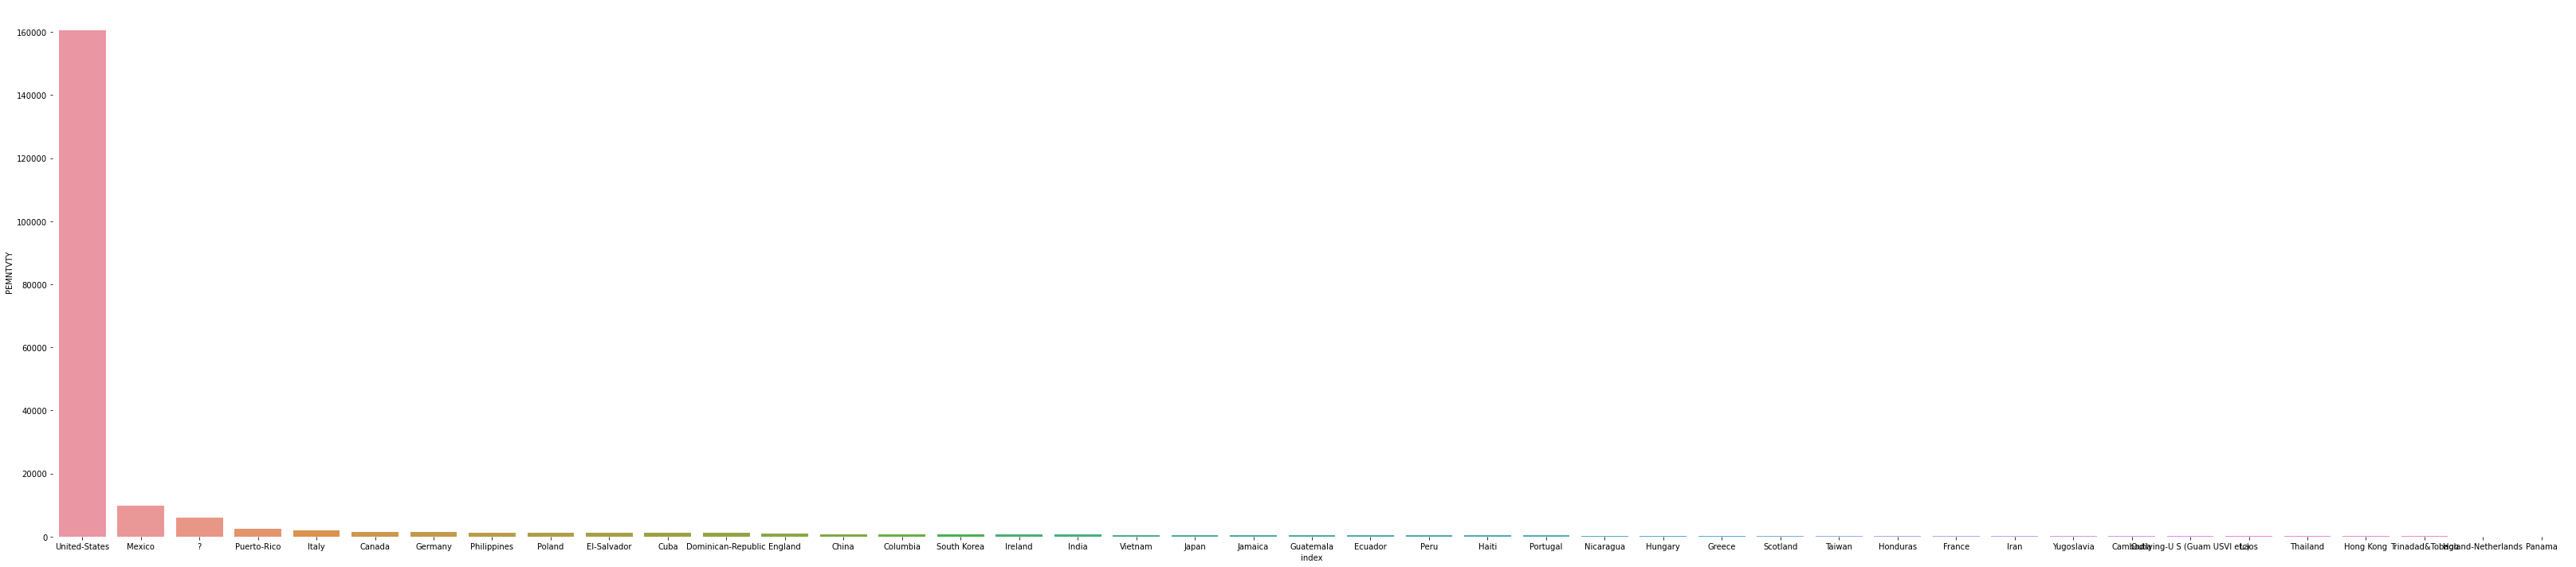

In [218]:
'PEMNTVTY'
plt.figure(figsize=(45,10))
plot_df= pd.value_counts(df['PEMNTVTY']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['PEMNTVTY'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

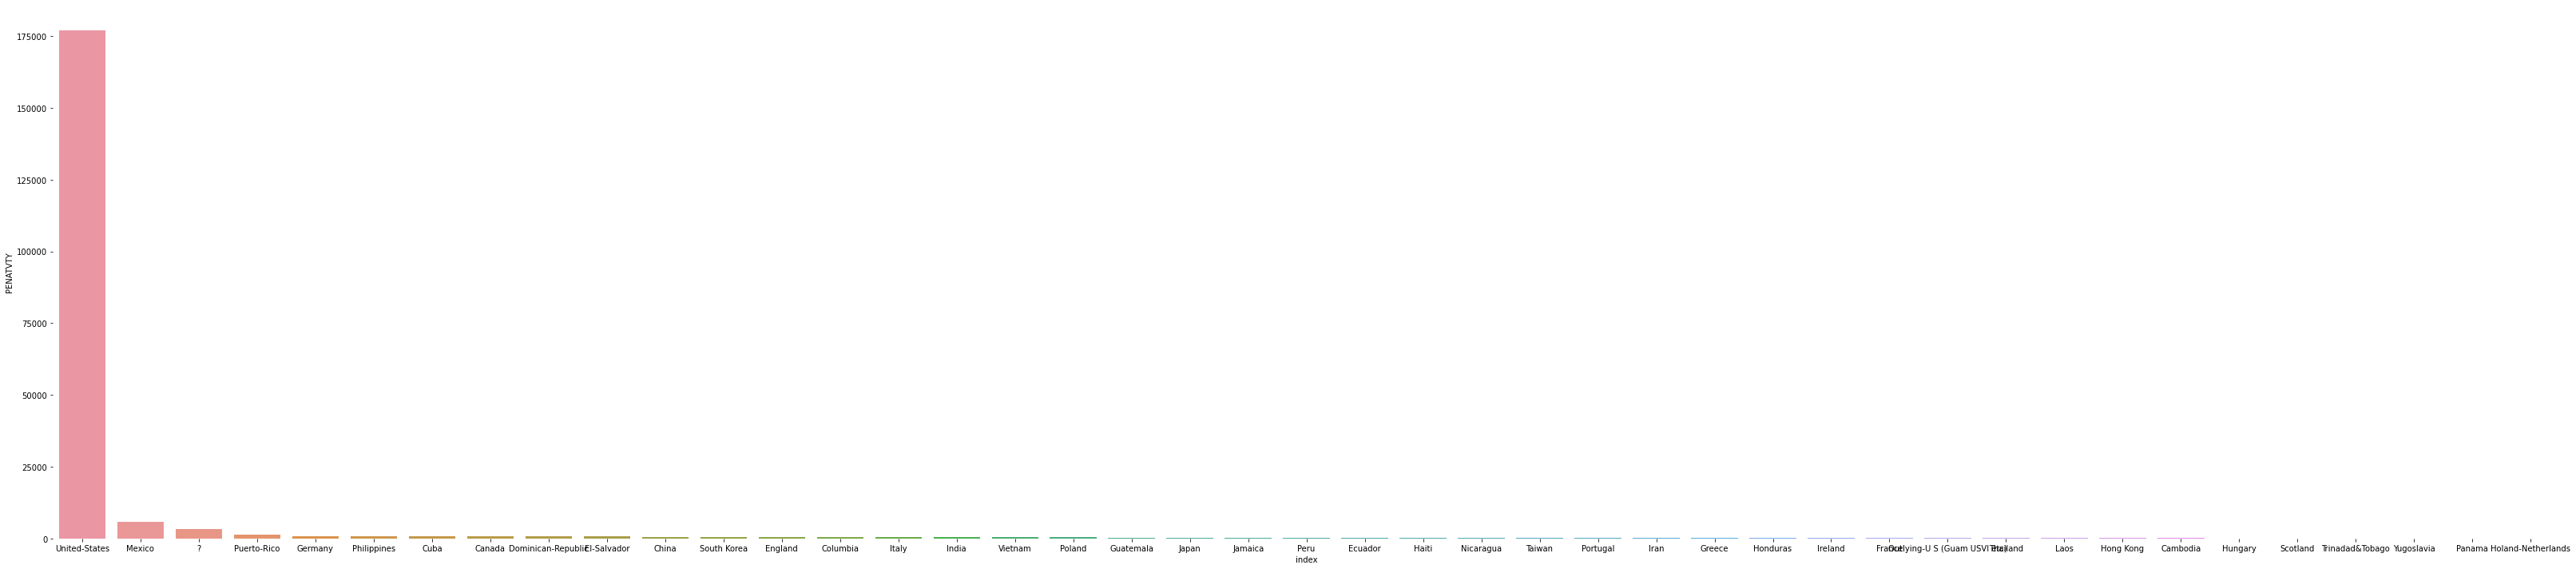

In [219]:
'PENATVTY'
plt.figure(figsize=(45,10))
plot_df= pd.value_counts(df['PENATVTY']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['PENATVTY'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

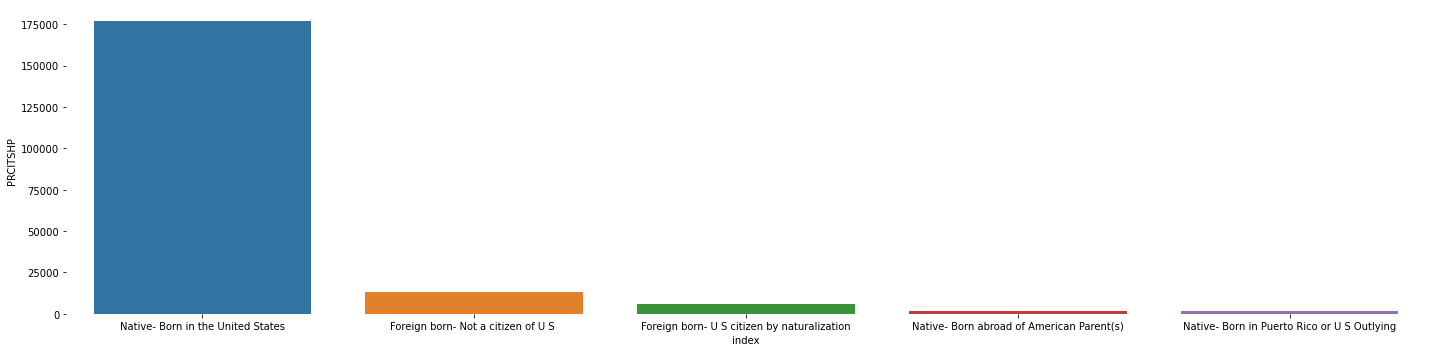

In [222]:
'PRCITSHP'
plt.figure(figsize=(20,5))
plot_df= pd.value_counts(df['PRCITSHP']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['PRCITSHP'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

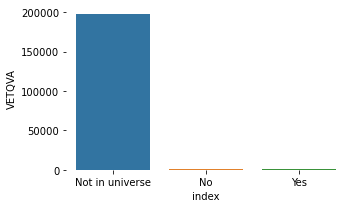

In [227]:
'VETQVA'
plt.figure(figsize=(5,3))
plot_df= pd.value_counts(df['VETQVA']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['VETQVA'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

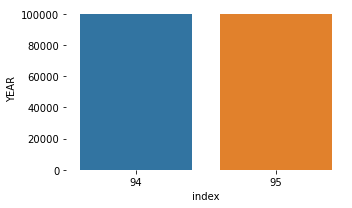

In [228]:
'YEAR'
plt.figure(figsize=(5,3))
plot_df= pd.value_counts(df['YEAR']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['YEAR'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

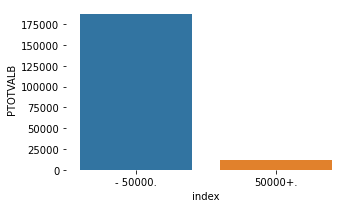

In [229]:
'PTOTVALB'
plt.figure(figsize=(5,3))
plot_df= pd.value_counts(df['PTOTVALB']).reset_index()
sns.barplot(x= plot_df['index'], y=plot_df['PTOTVALB'])
sns.despine(left=True, bottom=True)
plt.tight_layout()

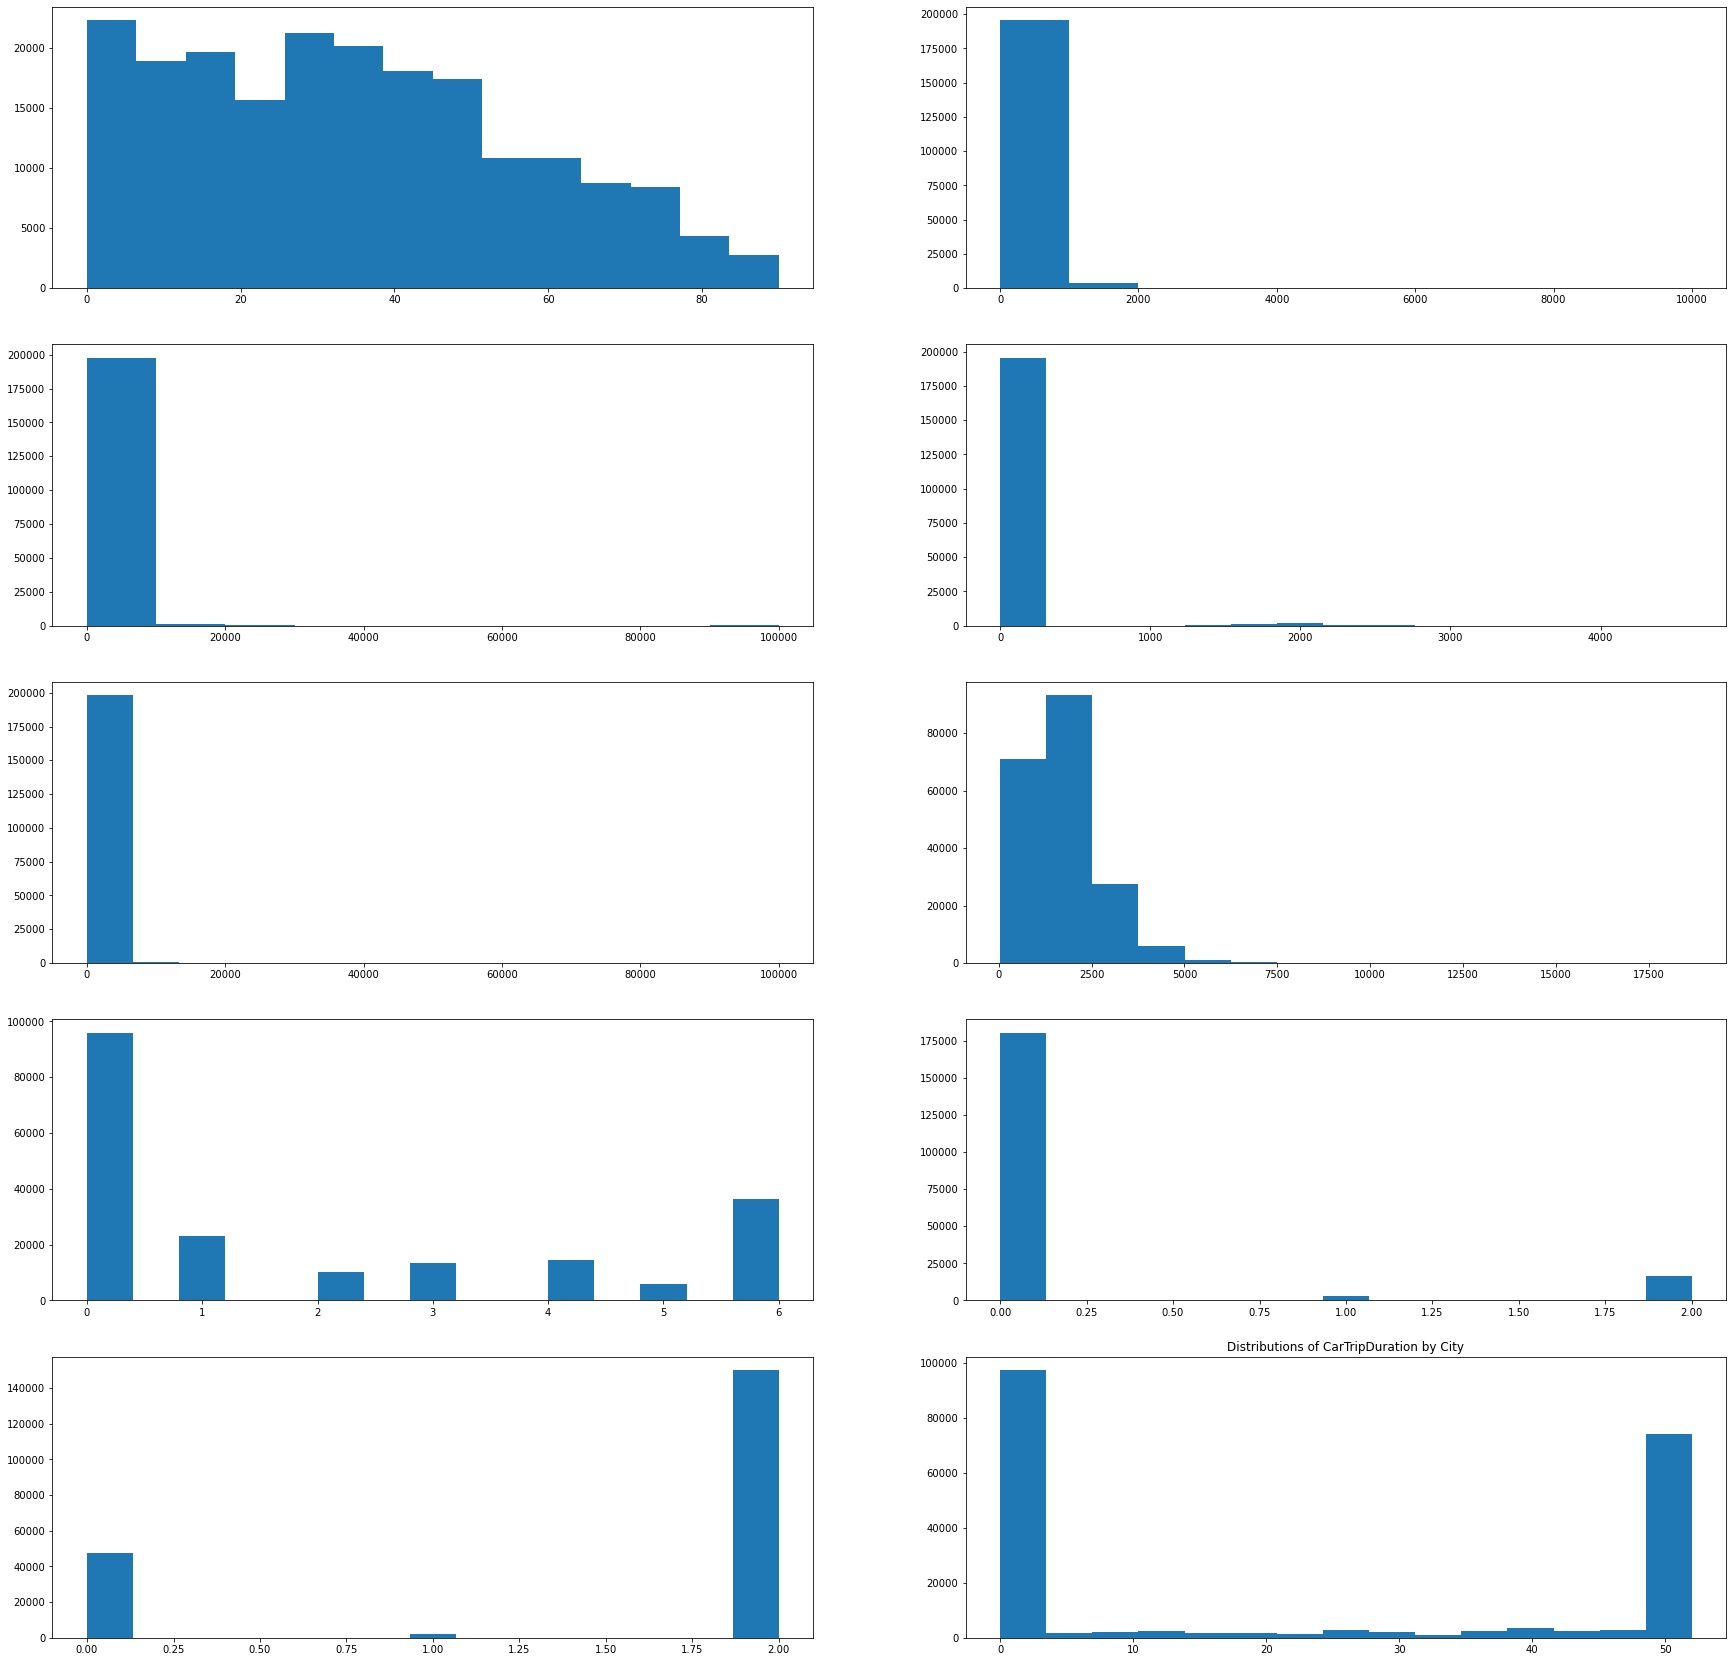

In [233]:
# histograms
fig, axs = plt.subplots(5,2,figsize=(30,30))
plt.title('Distributions of CarTripDuration by City')

#df_for_hist = df[col_list]
axs[0, 0].hist(df['AAGE'], bins=14, label ='AAGE')
axs[0, 1].hist(df['AHRSPAY'], bins=10, label='AHRSPAY')
axs[1, 0].hist(df['CAPGAIN'], bins=10, label='CAPGAIN')
axs[1, 1].hist(df['CAPLOSS'], bins=15, label= 'CAPLOSS')
axs[2, 0].hist(df['DIVVAL'], bins=15, label= 'DIVVAL')
axs[2, 1].hist(df['MARSUPWT'], bins=15, label= 'MARSUPWT')
axs[3, 0].hist(df['NOEMP'], bins=15, label='NOEMP')
axs[3, 1].hist(df['SEOTR'], bins=15, label='SEOTR')
axs[4, 0].hist(df['VETYN'], bins=15, label='VETYN')
axs[4, 1].hist(df['WKSWORK'], bins=15, label='WKSWORK')
plt.title('Distributions of CarTripDuration by City')
# plt.tight_layout()
plt.show()


### For this part I looked at Outlier Identification

For each continuous I feature, identified the outliers using the IQR method
For each feature, I reported the lower and upper bounds and number of instances that are identified as outliers.
Then, I displayed boxplots and discussed if my outliers analysis makes sense. Discussed why I would (or would not) use the IQR method.


AAGE
For AAGE: Q1: 15.0 Q3: 50.0 IQR: 35.0 Upperlimit: 102.5 Lowerlimit: -52.5


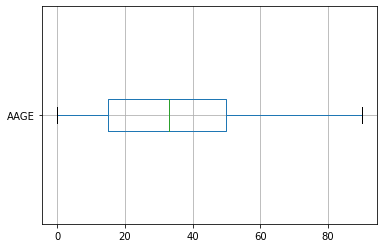

In [92]:
df.boxplot(column=['AAGE'], sym='r+', vert=False)
print('AAGE')
AAGE_ =df['AAGE'].sort_values()
Q1_a =AAGE_.quantile(0.25)
Q3_a= AAGE_.quantile(0.75)
IQR_a= Q3_a-Q1_a
Upperlimit_a= Q3_a + (1.5*(IQR_a))
Lowerlimit_a= Q1 - (1.5*(IQR_a))
print('For AAGE:','Q1:', Q1_a ,'Q3:', Q3_a, 'IQR:', IQR_a, 'Upperlimit:', Upperlimit_a, 'Lowerlimit:', Lowerlimit_a)

AHRSPAY
For AHRSPAY: Q1: 0.0 Q3: 0.0 IQR: 0.0 Upperlimit: 0.0 Lowerlimit: 0.0


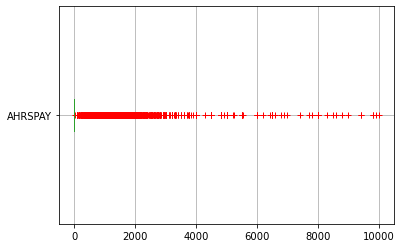

In [57]:
df.boxplot(column=['AHRSPAY'], sym='r+', vert=False)
print('AHRSPAY')
ahrspay_ =df['AHRSPAY'].sort_values()
Q1 =ahrspay_.quantile(0.25)
Q3= ahrspay_.quantile(0.75)
IQR= Q3-Q1
Upperlimit= Q3 + (1.5*(IQR))
Lowerlimit= Q1 - (1.5*(IQR))
print('For AHRSPAY:','Q1:', Q1 ,'Q3:', Q3, 'IQR:', IQR, 'Upperlimit:', Upperlimit, 'Lowerlimit:', Lowerlimit)

CAPGAIN
For CAPGAIN: Q1: 0.0 Q3: 0.0 IQR: 0.0 Upperlimit: 0.0 Lowerlimit: 0.0


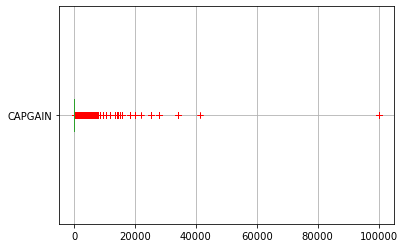

In [56]:
df.boxplot(column=['CAPGAIN'],sym='r+', vert=False)
print('CAPGAIN')
capgain_ =df['CAPGAIN'].sort_values()
Q1 =capgain_.quantile(0.25)
Q3= capgain_.quantile(0.75)
IQR= Q3-Q1
Upperlimit= Q3 + (1.5*(IQR))
Lowerlimit= Q1 - (1.5*(IQR))
print('For CAPGAIN:','Q1:', Q1 ,'Q3:', Q3, 'IQR:', IQR, 'Upperlimit:', Upperlimit, 'Lowerlimit:', Lowerlimit)

CAPLOSS
For CAPLOSS: Q1: 0.0 Q3: 0.0 IQR: 0.0 Upperlimit: 0.0 Lowerlimit: 0.0


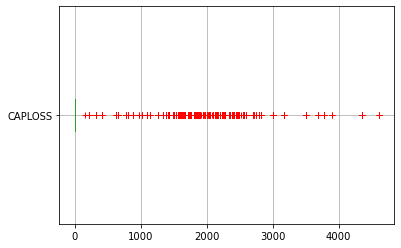

In [55]:
df.boxplot(column=['CAPLOSS'],sym='r+', vert=False)
print('CAPLOSS')
caploss_ =df['CAPLOSS'].sort_values()
Q1 =divval_.quantile(0.25)
Q3= divval_.quantile(0.75)
IQR= Q3-Q1
Upperlimit= Q3 + (1.5*(IQR))
Lowerlimit= Q1 - (1.5*(IQR))
print('For CAPLOSS:','Q1:', Q1 ,'Q3:', Q3, 'IQR:', IQR, 'Upperlimit:', Upperlimit, 'Lowerlimit:', Lowerlimit)

DIVVAL
For DIVVAL: Q1: 0.0 Q3: 0.0 IQR: 0.0 Upperlimit: 0.0 Lowerlimit: 0.0


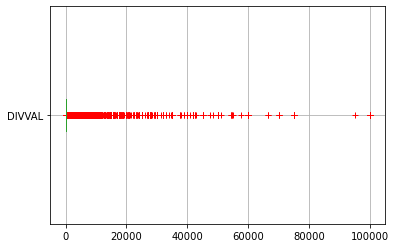

In [54]:
df.boxplot(column=['DIVVAL'],sym='r+', vert=False)
print('DIVVAL')
divval_ =df['DIVVAL'].sort_values()
Q1 =divval_.quantile(0.25)
Q3= divval_.quantile(0.75)
IQR= Q3-Q1
Upperlimit= Q3 + (1.5*(IQR))
Lowerlimit= Q1 - (1.5*(IQR))
print('For DIVVAL:','Q1:', Q1 ,'Q3:', Q3, 'IQR:', IQR, 'Upperlimit:', Upperlimit, 'Lowerlimit:', Lowerlimit)

MARSUPWT
For MARSUPWT: Q1: 1061.615 Q3: 2188.61 IQR: 1126.9950000000001 Upperlimit: 3879.1025000000004 Lowerlimit: -628.8775000000003


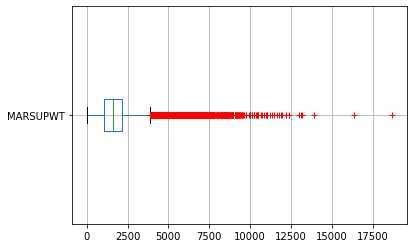

In [82]:
df.boxplot(column=['MARSUPWT'], sym='r+', vert=False)
print('MARSUPWT')
masuptw_ =df['MARSUPWT'].sort_values()
Q1_m =masuptw_.quantile(0.25)
Q3_m= masuptw_.quantile(0.75)
IQR_m= Q3_m-Q1_m
Upperlimit_m= Q3_m + (1.5*(IQR_m))
Lowerlimit_m= Q1_m - (1.5*(IQR_m))
print('For MARSUPWT:','Q1:', Q1_m ,'Q3:', Q3_m, 'IQR:', IQR_m, 'Upperlimit:', Upperlimit_m, 'Lowerlimit:', Lowerlimit_m)

NOEMP
For NOEMP: Q1: 0.0 Q3: 4.0 IQR: 4.0 Upperlimit: 10.0 Lowerlimit: -6.0


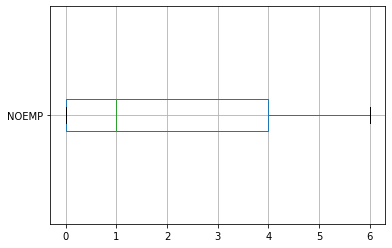

In [52]:
df.boxplot(column=['NOEMP'],sym='r+', vert=False)
print('NOEMP')
noemp_ =df['NOEMP'].sort_values()
Q1 =noemp_.quantile(0.25)
Q3= noemp_.quantile(0.75)
IQR= Q3-Q1
Upperlimit= Q3 + (1.5*(IQR))
Lowerlimit= Q1 - (1.5*(IQR))
print('For NOEMP:','Q1:', Q1 ,'Q3:', Q3, 'IQR:', IQR, 'Upperlimit:', Upperlimit, 'Lowerlimit:', Lowerlimit)

SEOTR
For SEOTR: Q1: 0.0 Q3: 0.0 IQR: 0.0 Upperlimit: 0.0 Lowerlimit: 0.0


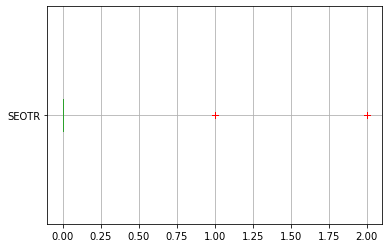

In [51]:
df.boxplot(column=['SEOTR'], sym='r+', vert=False)
print('SEOTR')
seotr_ =df['SEOTR'].sort_values()
Q1 =seotr_.quantile(0.25)
Q3= seotr_.quantile(0.75)
IQR= Q3-Q1
Upperlimit= Q3 + (1.5*(IQR))
Lowerlimit= Q1 - (1.5*(IQR))
print('For SEOTR:','Q1:', Q1 ,'Q3:', Q3, 'IQR:', IQR, 'Upperlimit:', Upperlimit, 'Lowerlimit:', Lowerlimit)

VETYN
For VETYN: Q1: 2.0 Q3: 2.0 IQR: 0.0 Upperlimit: 2.0 Lowerlimit: 2.0


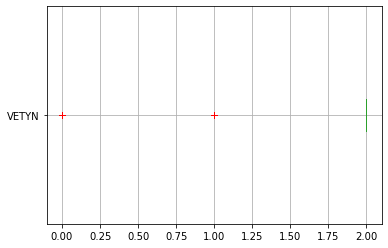

In [49]:
df.boxplot(column=['VETYN'], sym='r+', vert=False)
print('VETYN')
vetyn_ =df['VETYN'].sort_values()
Q1 =vetyn_.quantile(0.25)
Q3= vetyn_.quantile(0.75)
IQR= Q3-Q1
Upperlimit= Q3 + (1.5*(IQR))
Lowerlimit= Q1 - (1.5*(IQR))
print('For VETYN:','Q1:', Q1 ,'Q3:', Q3, 'IQR:', IQR, 'Upperlimit:', Upperlimit, 'Lowerlimit:', Lowerlimit)

WKSWORK
For WKSWORK: Q1: 0.0 Q3: 52.0 IQR: 52.0 Upperlimit: 130.0 Lowerlimit: 0.0


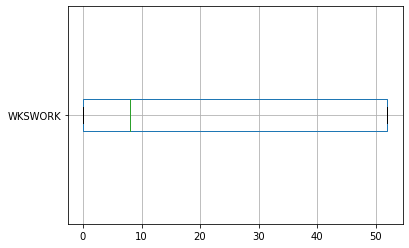

In [58]:
df.boxplot(column=['WKSWORK'], sym='r+', vert=False)
print('WKSWORK')
wkswork_ =df['WKSWORK'].sort_values()
Q1_w =wkswork_.quantile(0.25)
Q3_w= wkswork_.quantile(0.75)
IQR_w= Q3_w-Q1_w
Upperlimit_w= Q3_w + (1.5*(IQR_w))
Lowerlimit_w= Q1_w - (1.5*(IQR_w))
print('For WKSWORK:','Q1:', Q1_w ,'Q3:', Q3_w, 'IQR:', IQR_w, 'Upperlimit:', Upperlimit_w, 'Lowerlimit:', Lowerlimit)


#### Replace the outlying values in WKSWORK, MARSUPWT and AAGE features.
I Used clamping with upper and lower bounds I found in the previous step, I Reported how many individual cells are being updated(clamped) for each feature.


In [ ]:
# Since I have the calculations from the previous cells, i just called the values
#There are no oulying values to be replaced in the WKSWORK feature
Upperlimit_w
Lowerlimit_w
df[df['WKSWORK']>Upperlimit_w]
df[df['WKSWORK']<Lowerlimit_w]



,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVALB


In [91]:
#6238 records are considered outliers and clamped to the upper limit of MARSUPWT
# df[df['MARSUPWT']
df[df['MARSUPWT']<Lowerlimit_w]
df[df['MARSUPWT']>Upperlimit_m]

marsupwt_copy=df.copy()
marsupwt_copy[marsupwt_copy['MARSUPWT'] > Upperlimit_m] = Upperlimit_m
# marsupwt_copy['MARSUPWT'].value_counts()[Upperlimit_m]

6238

In [ ]:
#The max of AAGE is 90 and min 0 hence, There was no need for clamping as all the values fell between the upper and lower limit 
df[df['AAGE']>Upperlimit_a]
df[df['AAGE']<Lowerlimit_a]

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVALB


### Normalization

Here I Normalized the MARSUPWT, AAGE, NOEMP, CAPGAIN, and CAPLOSS features
* I Used range normalization for MARSUPWT feature
* I Used robust scaling for NOEMP feature
* I Used Z-score normalization for AAGE feature
* I Used log scaling for CAPGAIN and CAPLOSS features (imputed my zero values with 10 before transformation to avoid undefined  $log_{b}0$)

In [96]:
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from decimal import Decimal
from functools import reduce
import operator

In [98]:
 #MARSUPWT RANGE NORMALIZATION
df_copy=df.copy() 
# print(df_minmax.head())
df_minmax_train= df_copy['MARSUPWT'].values.reshape(-1, 1)
df_minmax_test = df_copy['MARSUPWT'].values.reshape(-1, 1)

min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(df_minmax_train) 
df_scaled = pd.DataFrame(data=scaled)
df_scaled.head(15)
# df_copy.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVALB
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [99]:
#AAGE
dfZ=df_copy['AAGE']
dfZ = stats.zscore(df['AAGE'])
print(dfZ.head(10))

0    1.725879
1    1.053560
2   -0.739291
3   -1.142682
4   -1.097861
5    0.605347
6    0.336419
7   -0.291078
8    0.560526
9   -0.022151
Name: AAGE, dtype: float64


In [103]:

df_robust_train= df_copy['NOEMP'] .values.reshape(-1, 1)
df_robust_test = df_copy['NOEMP'] .values.reshape(-1, 1)

robust_scaler = preprocessing.RobustScaler()
scaled = robust_scaler.fit_transform(df_robust_train) 
df_scaled = pd.DataFrame(data=scaled)
df_scaled.head(15)

,0
0,0.666667
1,-0.833333
2,0.666667
3,0.666667
4,0.666667
5,-0.833333
6,0.000000
7,-0.333333
8,-0.166667
9,0.000000


In [100]:
# CAPGAIN LOG TRANSFORMATION
df_copy = df.replace([0],10) #I replaced all zeros with 10
df_copy['CAPGAIN']=np.log10(df_copy['CAPGAIN'])
df_copy['CAPGAIN'].head(40)

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.000000
6     3.714162
7     1.000000
8     1.000000
9     1.000000
10    1.000000
11    1.000000
12    1.000000
13    1.000000
14    1.000000
15    1.000000
16    1.000000
17    1.000000
18    1.000000
19    1.000000
20    1.000000
21    1.000000
22    1.000000
23    1.000000
24    1.000000
25    1.000000
26    1.000000
27    1.000000
28    1.000000
29    1.000000
30    1.000000
31    1.000000
32    1.000000
33    1.000000
34    2.996074
35    1.000000
36    1.000000
37    1.000000
38    1.000000
39    1.000000
Name: CAPGAIN, dtype: float64